In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer

from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,  LabelEncoder
from feature_engine.encoding import OrdinalEncoder, RareLabelEncoder
from category_encoders import HashingEncoder


from feature_engine.selection import RecursiveFeatureElimination, DropDuplicateFeatures, DropCorrelatedFeatures
from feature_engine.selection import SmartCorrelatedSelection, SelectByShuffling

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, confusion_matrix, f1_score



In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Reading Datasets

In [6]:
train_claim = pd.read_csv('Train_Claim.csv',na_values = "?")
train_demographics= pd.read_csv('Train_Demographics.csv',na_values = "?")
train_policy = pd.read_csv('Train_Policy.csv', na_values = "?")
train_vehicle = pd.read_csv('Train_Vehicle.csv', na_values = "?")
train_data = pd.read_csv('Traindata_with_Target.csv', na_values = "?")

In [7]:
(train_claim.shape),(train_demographics.shape),(train_policy.shape),(train_vehicle.shape),(train_data.shape)

((28836, 19), (28836, 10), (28836, 10), (115344, 3), (28836, 2))

In [8]:
train_claim.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,NaN,1,0,NaN,65501,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481


In [9]:
train_claim['train_claim']= 0
train_policy['train_policy']= 0
train_vehicle['train_vehicle']= 0
train_demographics['train_demographics']= 0
train_data['train_data']= 0

In [10]:
train_policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID,train_policy
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001,0
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004,0
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005,0
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006,0
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007,0


In [11]:
train_vehicle.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails,train_vehicle
0,Cust20179,VehicleID,Vehicle8898,0
1,Cust21384,VehicleModel,Malibu,0
2,Cust33335,VehicleMake,Toyota,0
3,Cust27118,VehicleModel,Neon,0
4,Cust13038,VehicleID,Vehicle30212,0


In [12]:
train_vehicle.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails,train_vehicle
0,Cust20179,VehicleID,Vehicle8898,0
1,Cust21384,VehicleModel,Malibu,0
2,Cust33335,VehicleMake,Toyota,0
3,Cust27118,VehicleModel,Neon,0
4,Cust13038,VehicleID,Vehicle30212,0


In [13]:
group = [train_claim,train_demographics,train_policy, train_vehicle,train_data]

In [14]:
for col in group :
    print("column :", col.columns[-1])
    print('CustomerID_uniuqe_values : ', col['CustomerID'].nunique())
    print()

column : train_claim
CustomerID_uniuqe_values :  28836

column : train_demographics
CustomerID_uniuqe_values :  28836

column : train_policy
CustomerID_uniuqe_values :  28836

column : train_vehicle
CustomerID_uniuqe_values :  28836

column : train_data
CustomerID_uniuqe_values :  28836



In [15]:
name = ['train_claim','train_demographics','train_policy', 'train_vehicle','train_data']

In [16]:
for val in group :
    print('column :', val.columns[-1])
    print(val.isnull().mean()*100)
    print('*'*40)
    

column : train_claim
CustomerID                0.000000
DateOfIncident            0.000000
TypeOfIncident            0.000000
TypeOfCollission         17.901235
SeverityOfIncident        0.000000
AuthoritiesContacted      0.000000
IncidentState             0.000000
IncidentCity              0.000000
IncidentAddress           0.000000
IncidentTime              0.000000
NumberOfVehicles          0.000000
PropertyDamage           36.270634
BodilyInjuries            0.000000
Witnesses                 0.000000
PoliceReport             34.002636
AmountOfTotalClaim        0.000000
AmountOfInjuryClaim       0.000000
AmountOfPropertyClaim     0.000000
AmountOfVehicleDamage     0.000000
train_claim               0.000000
dtype: float64
****************************************
column : train_demographics
CustomerID               0.000000
InsuredAge               0.000000
InsuredZipCode           0.000000
InsuredGender            0.104037
InsuredEducationLevel    0.000000
InsuredOccupation        

In [17]:
for val in group :
    val.drop(val.columns[-1], axis =1, inplace = True )

In [18]:
train_vehicle.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212


In [19]:
train_vehicle['VehicleAttribute'].value_counts()

VehicleID       28836
VehicleModel    28836
VehicleMake     28836
VehicleYOM      28836
Name: VehicleAttribute, dtype: int64

In [20]:
train_vehicle['VehicleAttribute'].head()

0       VehicleID
1    VehicleModel
2     VehicleMake
3    VehicleModel
4       VehicleID
Name: VehicleAttribute, dtype: object

In [21]:
train_veh = train_vehicle.groupby('VehicleAttribute')
train_veh

In [22]:
for VehicleAttribute, Vehicle in train_veh:
    print(VehicleAttribute)

VehicleID
VehicleMake
VehicleModel
VehicleYOM


In [23]:
train_vehicleid =  train_veh.get_group('VehicleID') 
train_vehiclemodel = train_veh.get_group('VehicleModel')
train_vehiclemake = train_veh.get_group('VehicleMake')
train_vehicleyom = train_veh.get_group('VehicleYOM')

In [24]:
train_vehicleid.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
4,Cust13038,VehicleID,Vehicle30212
5,Cust1801,VehicleID,Vehicle24096
10,Cust14947,VehicleID,Vehicle15216
16,Cust19144,VehicleID,Vehicle29018


In [25]:
(train_vehicleid.shape),(train_vehiclemodel.shape),(train_vehiclemake.shape),(train_vehicleyom.shape)

((28836, 3), (28836, 3), (28836, 3), (28836, 3))

In [26]:
train_vehicleid.rename(columns = {'VehicleAttribute':'VehicleAttribute1', 'VehicleAttributeDetails':'VehicleAttributeDetails1'}, inplace = True)
train_vehiclemodel.rename(columns = {'VehicleAttribute':'VehicleAttribute2', 'VehicleAttributeDetails':'VehicleAttributeDetails2'}, inplace = True)
train_vehiclemake.rename(columns = {'VehicleAttribute':'VehicleAttribute3', 'VehicleAttributeDetails':'VehicleAttributeDetails3'}, inplace = True)
train_vehicleyom.rename(columns = {'VehicleAttribute':'VehicleAttribute4', 'VehicleAttributeDetails':'VehicleAttributeDetails4'}, inplace = True)

C:\Users\pramod\AppData\Local\Temp/ipykernel_3732/483878633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_vehicleid.rename(columns = {'VehicleAttribute':'VehicleAttribute1', 'VehicleAttributeDetails':'VehicleAttributeDetails1'}, inplace = True)
C:\Users\pramod\AppData\Local\Temp/ipykernel_3732/483878633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_vehiclemodel.rename(columns = {'VehicleAttribute':'VehicleAttribute2', 'VehicleAttributeDetails':'VehicleAttributeDetails2'}, inplace = True)
C:\Users\pramod\AppData\Local\Temp/ipykernel_3732/483878633.py:3: SettingWithCopyWarning: 
A value is trying 

In [27]:
(train_vehicleid.columns),(train_vehiclemodel.columns),(train_vehiclemake.columns),(train_vehicleyom.columns)

(Index(['CustomerID', 'VehicleAttribute1', 'VehicleAttributeDetails1'], dtype='object'),
 Index(['CustomerID', 'VehicleAttribute2', 'VehicleAttributeDetails2'], dtype='object'),
 Index(['CustomerID', 'VehicleAttribute3', 'VehicleAttributeDetails3'], dtype='object'),
 Index(['CustomerID', 'VehicleAttribute4', 'VehicleAttributeDetails4'], dtype='object'))

In [28]:
df1 = pd.merge(train_data,train_claim, on = ['CustomerID'], how='inner')
df2 = pd.merge(df1,train_demographics,on = ['CustomerID'], how='inner')
df3 = pd.merge(df2,train_policy,on = ['CustomerID'], how='inner')
df4 = pd.merge(df3,train_vehicleid,on = ['CustomerID'], how='inner')
df5 = pd.merge(df4,train_vehiclemodel,on = ['CustomerID'], how='inner')
df6 = pd.merge(df5,train_vehiclemake,on = ['CustomerID'], how='inner')
train_df = pd.merge(df6,train_vehicleyom,on = ['CustomerID'], how='inner')

In [29]:
train_df.head()

,CustomerID,ReportedFraud,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4
0,Cust20065,N,2015-01-09,Multi-vehicle Collision,Rear Collision,Total Loss,Other,State9,City4,Location 1404,19,3,NaN,1,1,NaN,43973,9396,4698,29879,58,471784,MALE,JD,sales,video-games,0,-42700,India,129186,432,1998-11-14,State2,250/500,2000,1142.87,0,own-child,VehicleID,Vehicle30662,VehicleModel,E400,VehicleMake,Mercedes,VehicleYOM,2005
1,Cust37589,N,2015-02-20,Single Vehicle Collision,Side Collision,Minor Damage,Ambulance,State4,City3,Location 1675,14,1,NaN,1,1,YES,62310,6539,6539,49232,34,431937,FEMALE,High School,transport-moving,polo,51300,0,India,146710,128,2000-08-19,State2,100/300,1000,1274.38,2857344,own-child,VehicleID,Vehicle17183,VehicleModel,Highlander,VehicleMake,Toyota,VehicleYOM,2010
2,Cust24312,N,2015-01-14,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State5,City2,Location 1546,21,3,NaN,0,0,NaN,42824,6069,6069,30686,52,479320,FEMALE,PhD,machine-op-inspct,exercise,0,0,India,133433,346,2000-06-23,State1,500/1000,745,1269.93,0,other-relative,VehicleID,Vehicle33982,VehicleModel,Passat,VehicleMake,Volkswagen,VehicleYOM,2002
3,Cust5493,Y,2015-01-07,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State7,City4,Location 1413,12,3,YES,2,0,NaN,45672,253,5741,39678,25,607763,FEMALE,College,exec-managerial,exercise,47400,-56100,India,114614,42,1992-01-15,State2,100/300,986,1218.60,0,other-relative,VehicleID,Vehicle12299,VehicleModel,Highlander,VehicleMake,Toyota,VehicleYOM,2011
4,Cust7704,Y,2015-02-26,Multi-vehicle Collision,Side Collision,Major Damage,Other,State4,City6,Location 1367,3,3,NO,1,2,NO,81472,7407,14813,59252,27,441783,MALE,Masters,sales,chess,0,0,India,116825,109,2001-09-23,State3,250/500,576,1431.02,4235779,unmarried,VehicleID,Vehicle30447,VehicleModel,Wrangler,VehicleMake,Ford,VehicleYOM,2010


In [30]:
train_df['DateOfIncident'] = pd.to_datetime(train_df['DateOfIncident']).dt.month
train_df['DateOfPolicyCoverage'] = pd.to_datetime(train_df['DateOfPolicyCoverage']).dt.month

In [31]:
train_df.shape

(28836, 46)

In [32]:
train_df.head().T

,0,1,2,3,4
CustomerID,Cust20065,Cust37589,Cust24312,Cust5493,Cust7704
ReportedFraud,N,N,N,Y,Y
DateOfIncident,1,2,1,1,2
TypeOfIncident,Multi-vehicle Collision,Single Vehicle Collision,Multi-vehicle Collision,Multi-vehicle Collision,Multi-vehicle Collision
TypeOfCollission,Rear Collision,Side Collision,Side Collision,Side Collision,Side Collision
SeverityOfIncident,Total Loss,Minor Damage,Major Damage,Major Damage,Major Damage
AuthoritiesContacted,Other,Ambulance,Ambulance,Ambulance,Other
IncidentState,State9,State4,State5,State7,State4
IncidentCity,City4,City3,City2,City4,City6
IncidentAddress,Location 1404,Location 1675,Location 1546,Location 1413,Location 1367


# Datatypes

In [574]:
train_df.dtypes

CustomerID                     object
ReportedFraud                  object
DateOfIncident                  int64
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                    int64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                      object
PoliceReport                   object
AmountOfTotalClaim             object
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains

In [575]:
cat_var = [feature for feature in train_df.columns if train_df[feature].dtypes=='O']
len(cat_var)

29

In [576]:
num_var = [feature for feature in train_df.columns if train_df[feature].dtypes!='O']
len(num_var)

17

In [577]:
date = [feature for feature in train_df.columns if 'date' in feature or 'Date' in feature]
date

['DateOfIncident', 'DateOfPolicyCoverage']

In [578]:
train_df[date].head()

,DateOfIncident,DateOfPolicyCoverage
0,1,11
1,2,8
2,1,6
3,1,1
4,2,9


In [579]:
train_df[date].nunique()

DateOfIncident           3
DateOfPolicyCoverage    12
dtype: int64

In [ ]:
train_df[date].head()

# EDA

In [580]:
na_feature = [feature for feature in train_df.columns if train_df[feature].isnull().sum()>1]
na_feature

['TypeOfCollission',
 'PropertyDamage',
 'PoliceReport',
 'InsuredGender',
 'Country']

In [581]:
for feature in na_feature :
    print(feature, "column has", np.round(train_df[feature].isnull().mean(),4)*100,'% missing values')

TypeOfCollission column has 17.9 % missing values
PropertyDamage column has 36.27 % missing values
PoliceReport column has 34.0 % missing values
InsuredGender column has 0.1 % missing values
Country column has 0.01 % missing values


# Drop duplicates

In [585]:
train_df.drop_duplicates(keep = 'first',inplace=True)
print(train_df.shape)

(28836, 46)


In [586]:
num_feature = [feature for feature in train_df.columns if train_df[feature].dtypes!='object']
print(len(num_feature))
train_df[num_feature].head()

17


,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,1,19,3,1,9396,4698,29879,58,471784,0,-42700,129186,432,11,2000,1142.87,0
1,2,14,1,1,6539,6539,49232,34,431937,51300,0,146710,128,8,1000,1274.38,2857344
2,1,21,3,0,6069,6069,30686,52,479320,0,0,133433,346,6,745,1269.93,0
3,1,12,3,2,253,5741,39678,25,607763,47400,-56100,114614,42,1,986,1218.60,0
4,2,3,3,1,7407,14813,59252,27,441783,0,0,116825,109,9,576,1431.02,4235779


In [587]:
cat_feature = [feature for feature in train_df.columns if train_df[feature].dtypes=='object']
print(len(cat_feature))
train_df[cat_feature].head()

29


,CustomerID,ReportedFraud,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,AmountOfTotalClaim,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Country,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4
0,Cust20065,N,Multi-vehicle Collision,Rear Collision,Total Loss,Other,State9,City4,Location 1404,NaN,1,NaN,43973,MALE,JD,sales,video-games,India,State2,250/500,own-child,VehicleID,Vehicle30662,VehicleModel,E400,VehicleMake,Mercedes,VehicleYOM,2005
1,Cust37589,N,Single Vehicle Collision,Side Collision,Minor Damage,Ambulance,State4,City3,Location 1675,NaN,1,YES,62310,FEMALE,High School,transport-moving,polo,India,State2,100/300,own-child,VehicleID,Vehicle17183,VehicleModel,Highlander,VehicleMake,Toyota,VehicleYOM,2010
2,Cust24312,N,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State5,City2,Location 1546,NaN,0,NaN,42824,FEMALE,PhD,machine-op-inspct,exercise,India,State1,500/1000,other-relative,VehicleID,Vehicle33982,VehicleModel,Passat,VehicleMake,Volkswagen,VehicleYOM,2002
3,Cust5493,Y,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State7,City4,Location 1413,YES,0,NaN,45672,FEMALE,College,exec-managerial,exercise,India,State2,100/300,other-relative,VehicleID,Vehicle12299,VehicleModel,Highlander,VehicleMake,Toyota,VehicleYOM,2011
4,Cust7704,Y,Multi-vehicle Collision,Side Collision,Major Damage,Other,State4,City6,Location 1367,NO,2,NO,81472,MALE,Masters,sales,chess,India,State3,250/500,unmarried,VehicleID,Vehicle30447,VehicleModel,Wrangler,VehicleMake,Ford,VehicleYOM,2010


# Imbalance dataset

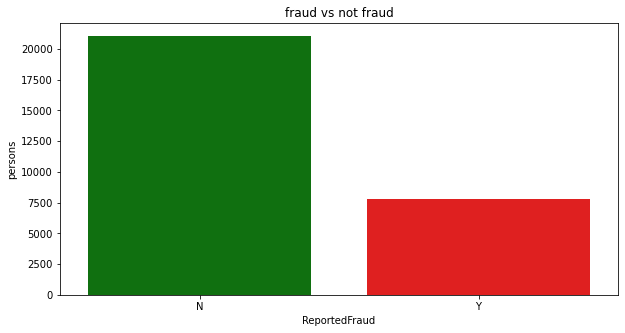

In [591]:
# Target Variable Countplot
#sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(train_df['ReportedFraud'], palette= ['green','red'])
plt.title('fraud vs not fraud')
plt.ylabel('persons')
plt.show()

In [592]:
train_df['ReportedFraud'].value_counts(normalize= True)*100

N    73.002497
Y    26.997503
Name: ReportedFraud, dtype: float64

In [593]:
discrete_feature = [feature for feature in num_feature if len(train_df[feature].unique())<15 and feature not in date_col+['CustomerID']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 4


In [594]:
train_df[discrete_feature].head()

,DateOfIncident,NumberOfVehicles,BodilyInjuries,DateOfPolicyCoverage
0,1,3,1,11
1,2,1,1,8
2,1,3,0,6
3,1,3,2,1
4,2,3,1,9


In [595]:
continuous_feature=[feature for feature in num_feature if feature  not in discrete_feature+date_col+['CustomerID']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 13


In [596]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course

import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

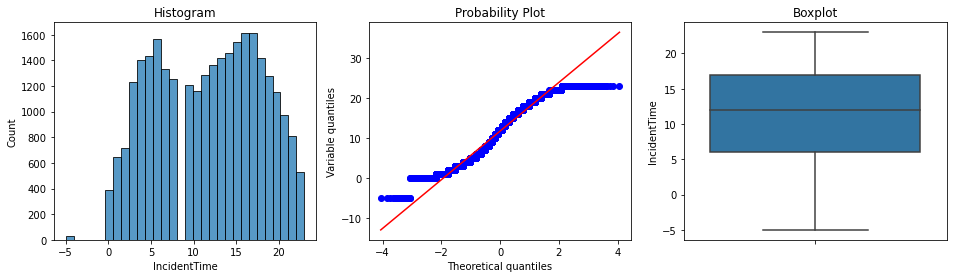

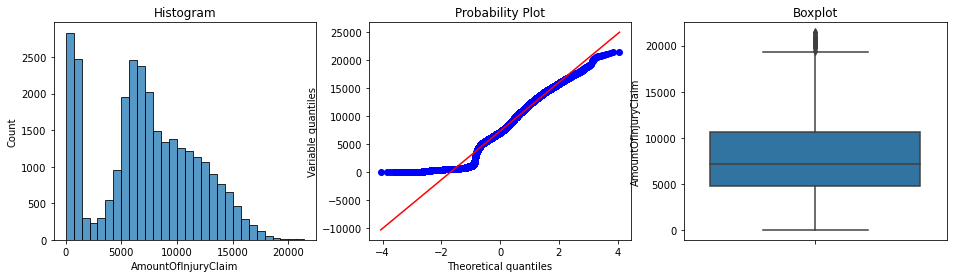

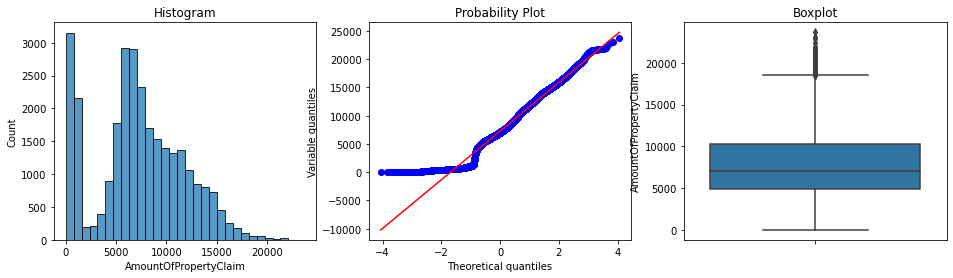

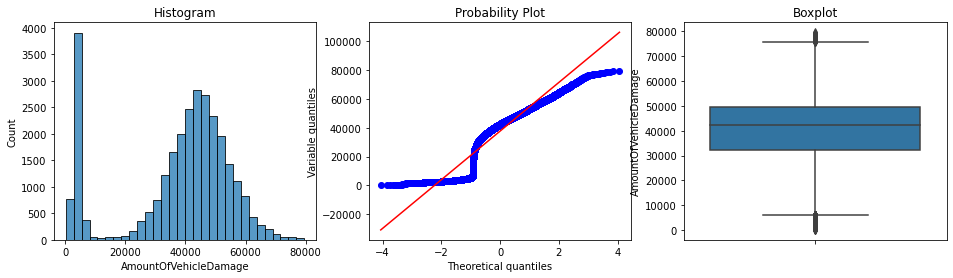

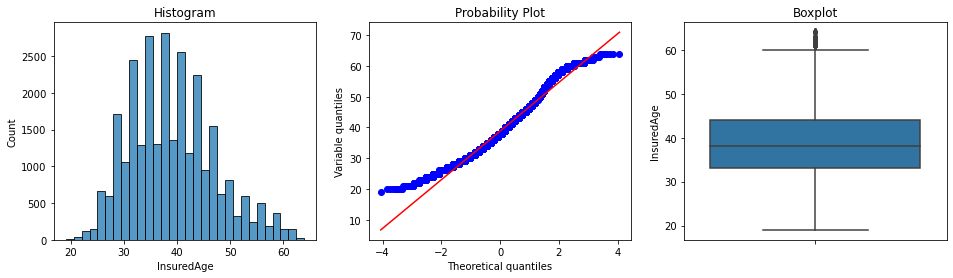

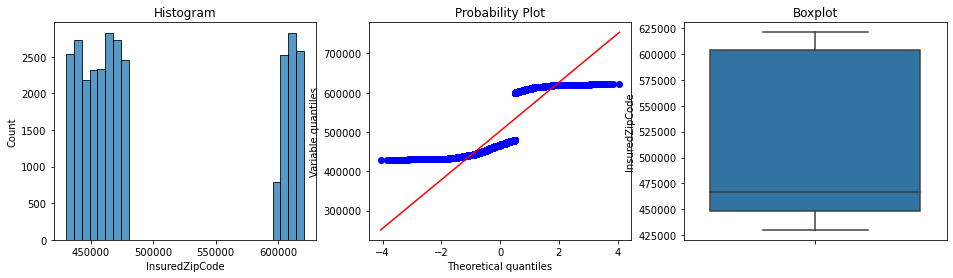

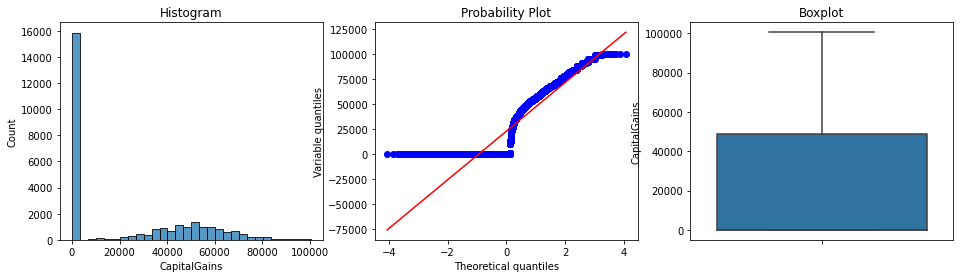

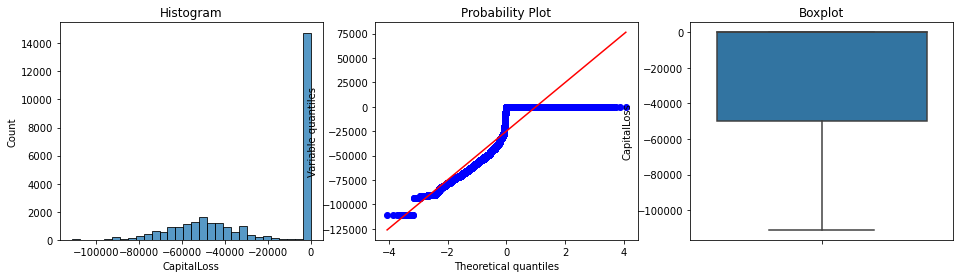

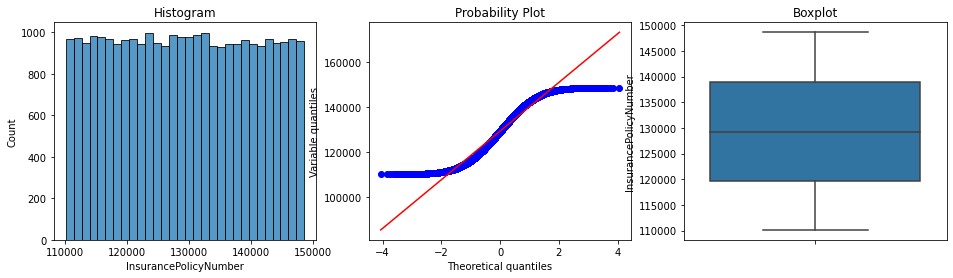

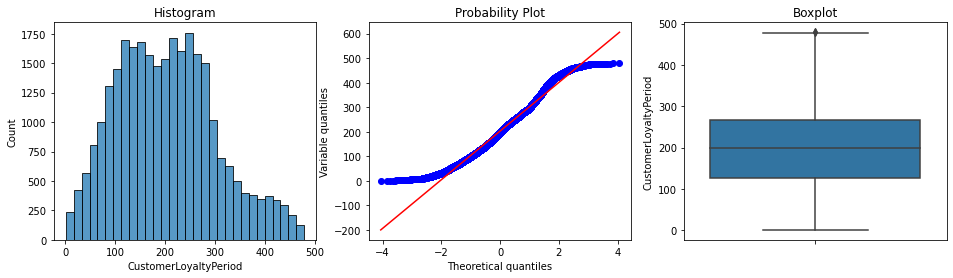

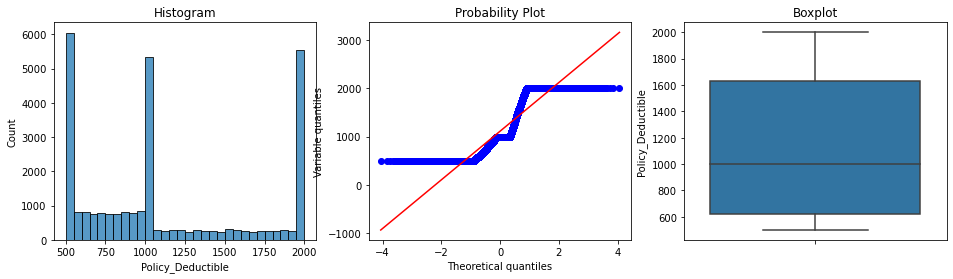

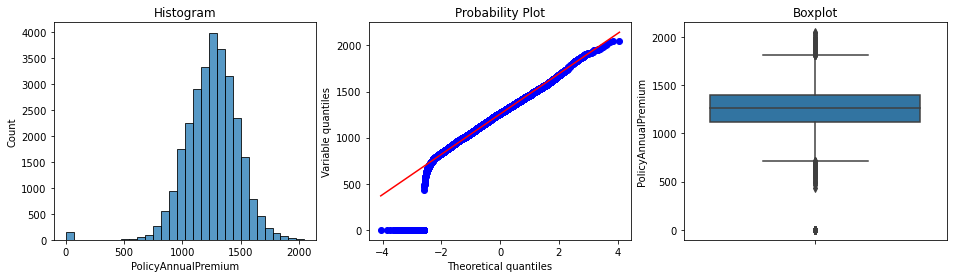

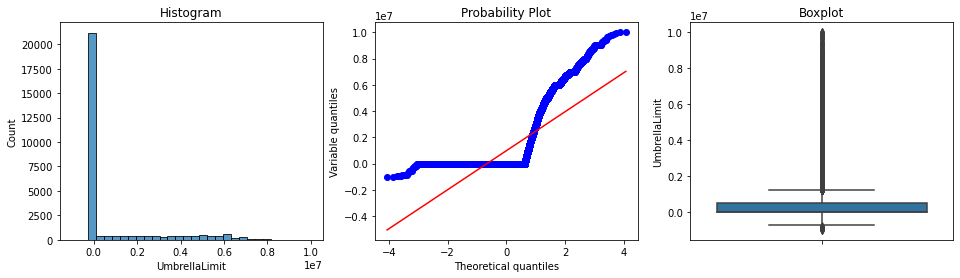

In [598]:
for feature in continuous_feature :

    diagnostic_plots(train_df, feature)


# Outlier treatment

In [599]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [600]:
train_df.shape

(28836, 46)

In [601]:
#negative part of prices
final_neg =train_df[train_df['AmountOfInjuryClaim']<0]

#positive part of prices
final_pos =train_df[train_df['AmountOfInjuryClaim']>0]

final_pos
final_neg

,CustomerID,ReportedFraud,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4


In [602]:
#getting minimums of each 
#minimum_neg = final_neg.loc[final_neg['AmountOfInjuryClaim'].idxmin()]['AmountOfInjuryClaim']
minimum_pos= final_pos.loc[final_pos['AmountOfInjuryClaim'].idxmax()]['AmountOfInjuryClaim']
minimum_pos

21450

In [603]:
train_df['AmountOfInjuryClaim'].idxmin()

1369

In [604]:
train_df['AmountOfInjuryClaim'].idxmax()

23004

In [605]:
# let's flag the outliers in the data set


A_upper_limit, A_lower_limit = find_skewed_boundaries(train_df, 'AmountOfInjuryClaim', 1.5)
print(A_upper_limit, A_lower_limit)
outliers_AmountOfInjuryClaim = np.where(train_df['AmountOfInjuryClaim'] > A_upper_limit, True,
                       np.where(train_df['AmountOfInjuryClaim'] < A_lower_limit, True, False))

19312.5 -3997.5


In [606]:
len(outliers_AmountOfInjuryClaim == True)

28836

In [607]:
B_upper_limit, B_lower_limit = find_skewed_boundaries(train_df, 'AmountOfPropertyClaim', 1.5)
print(B_upper_limit, B_lower_limit)
outliers_AmountOfPropertyClaim = np.where(train_df['AmountOfPropertyClaim'] > B_upper_limit, True,
                       np.where(train_df['AmountOfPropertyClaim'] < B_lower_limit, True, False))

18524.5 -3335.5


In [608]:
len(outliers_AmountOfPropertyClaim==False)

28836

In [609]:
C_upper_limit, C_lower_limit = find_skewed_boundaries(train_df, 'PolicyAnnualPremium', 1.5)
print(C_upper_limit, C_lower_limit)
outliers_PolicyAnnualPremium = np.where(train_df['PolicyAnnualPremium'] > C_upper_limit, True,
                       np.where(train_df['PolicyAnnualPremium'] < C_lower_limit, True, False))

1808.5012500000003 710.1112499999998


In [610]:
D_upper_limit, D_lower_limit = find_skewed_boundaries(train_df, 'UmbrellaLimit', 1.5)
print(D_upper_limit, D_lower_limit)
outliers_UmbrellaLimit = np.where(train_df['UmbrellaLimit'] > D_upper_limit, True,
                       np.where(train_df['UmbrellaLimit'] < D_lower_limit, True, False))

1214902.5 -728941.5


In [611]:

train_df_trimmed = train_df.loc[~(outliers_AmountOfInjuryClaim + outliers_AmountOfPropertyClaim + outliers_PolicyAnnualPremium+outliers_UmbrellaLimit), ]

train_df.shape, train_df_trimmed.shape

((28836, 46), (21856, 46))

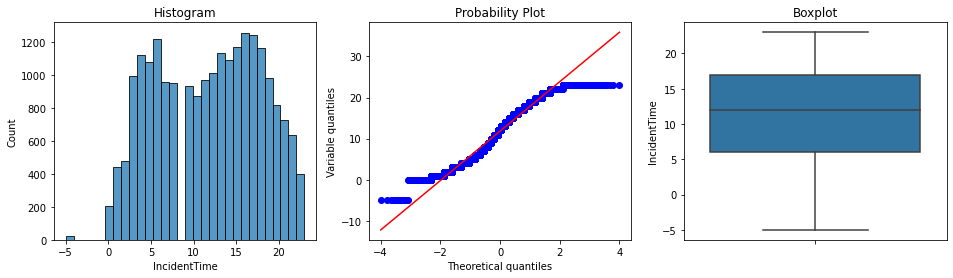

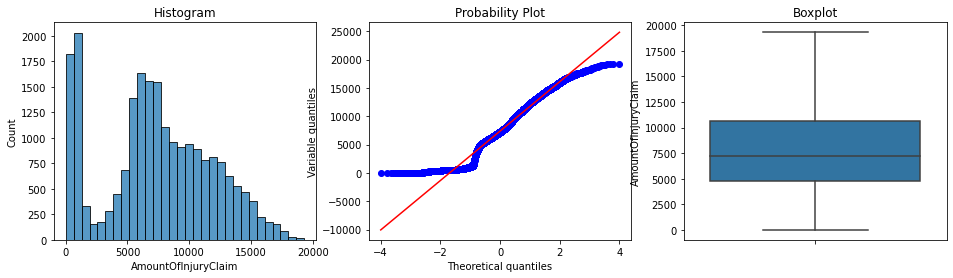

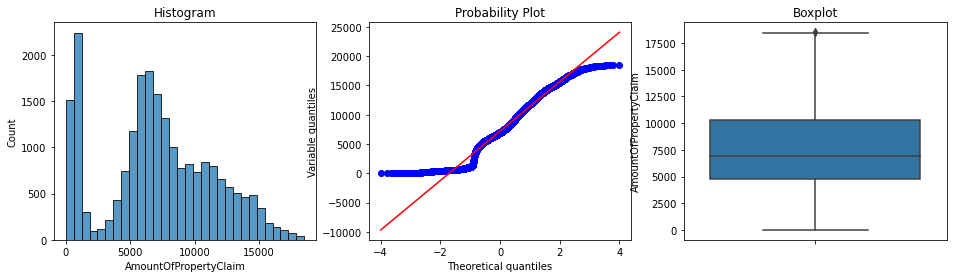

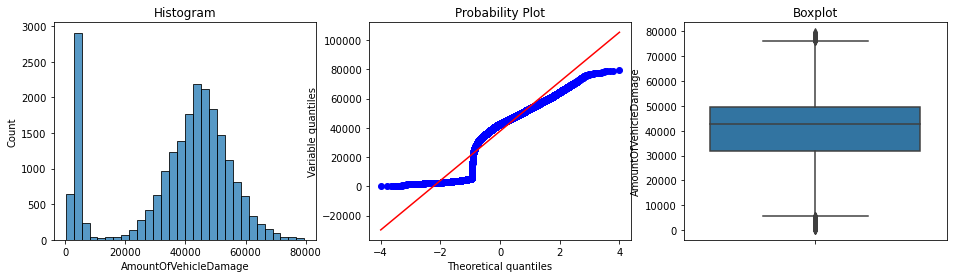

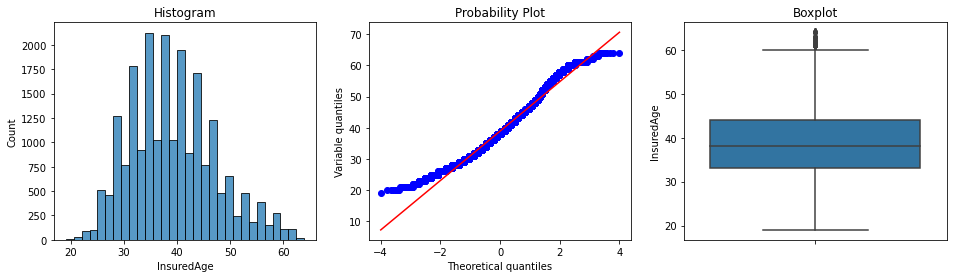

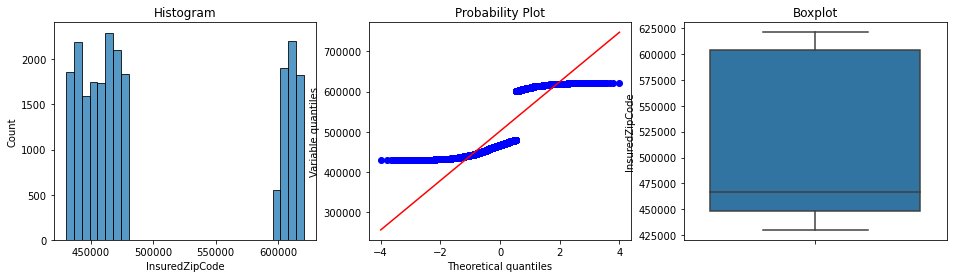

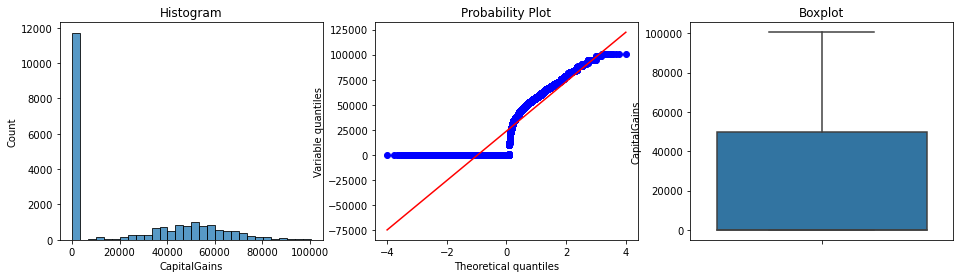

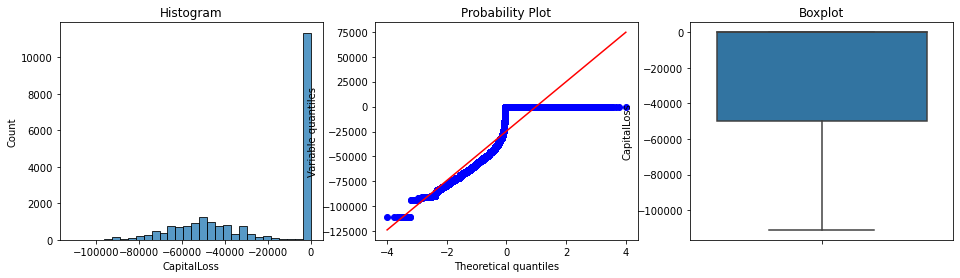

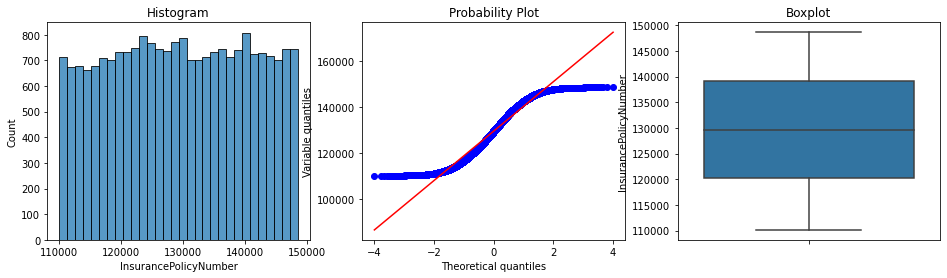

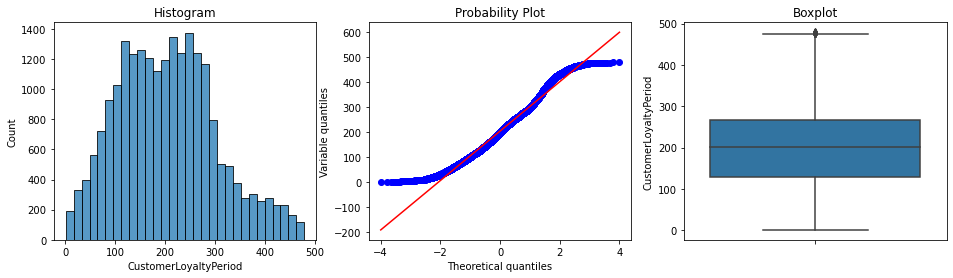

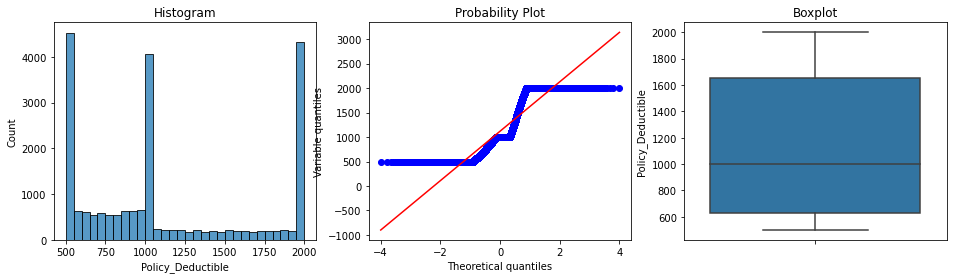

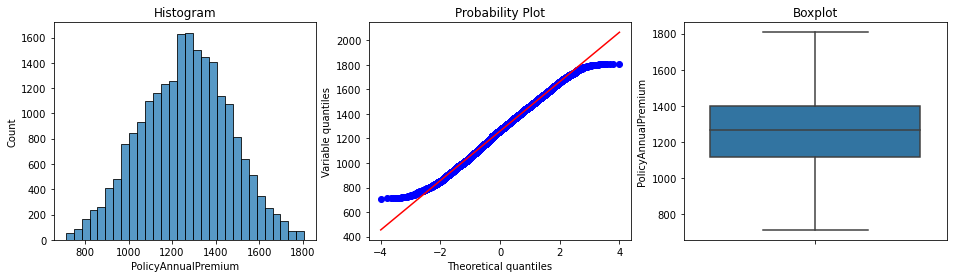

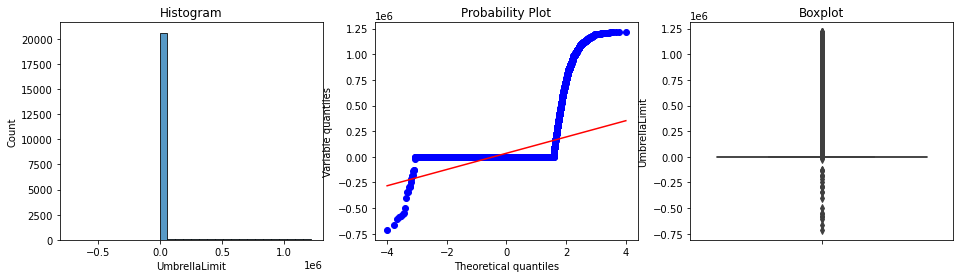

In [613]:
for feature in continuous_feature :

    diagnostic_plots(train_df_trimmed, feature)

In [650]:
from feature_engine.outliers import Winsorizer

In [827]:
# create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['AmountOfInjuryClaim','AmountOfPropertyClaim','PolicyAnnualPremium',
                                     'UmbrellaLimit','AmountOfVehicleDamage'])

windsoriser.fit(train_df)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['AmountOfInjuryClaim', 'AmountOfPropertyClaim',
                      'PolicyAnnualPremium', 'UmbrellaLimit',
                      'AmountOfVehicleDamage'])

In [828]:
train_df_capping = windsoriser.transform(train_df)

In [829]:
windsoriser.left_tail_caps_

{'AmountOfInjuryClaim': -3997.5,
 'AmountOfPropertyClaim': -3335.5,
 'PolicyAnnualPremium': 710.1112499999998,
 'UmbrellaLimit': -728941.5,
 'AmountOfVehicleDamage': 6179.5}

In [830]:
# we can inspect the maximum caps for each variable
windsoriser.right_tail_caps_

{'AmountOfInjuryClaim': 19312.5,
 'AmountOfPropertyClaim': 18524.5,
 'PolicyAnnualPremium': 1808.5012500000003,
 'UmbrellaLimit': 1214902.5,
 'AmountOfVehicleDamage': 75549.5}

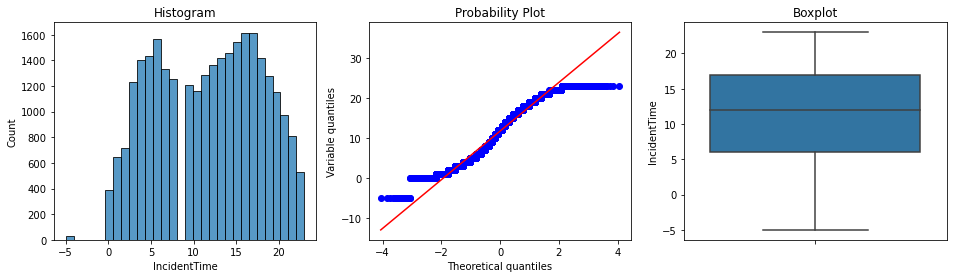

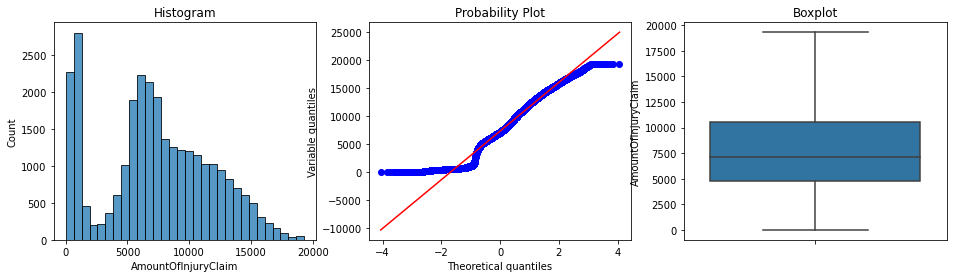

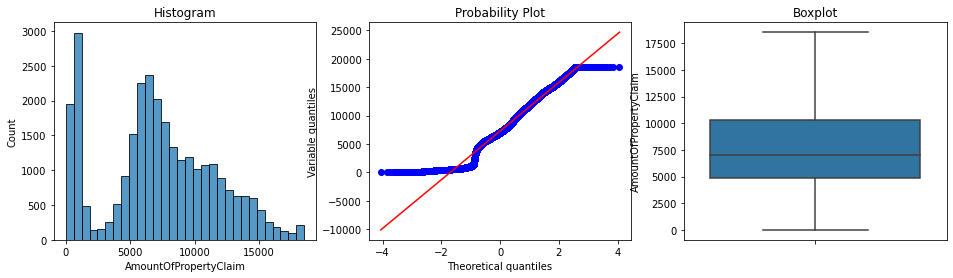

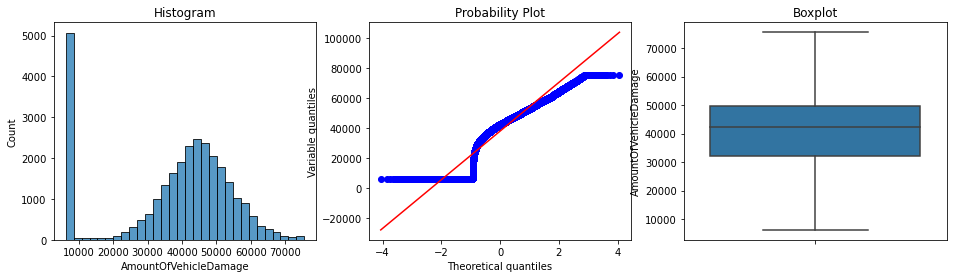

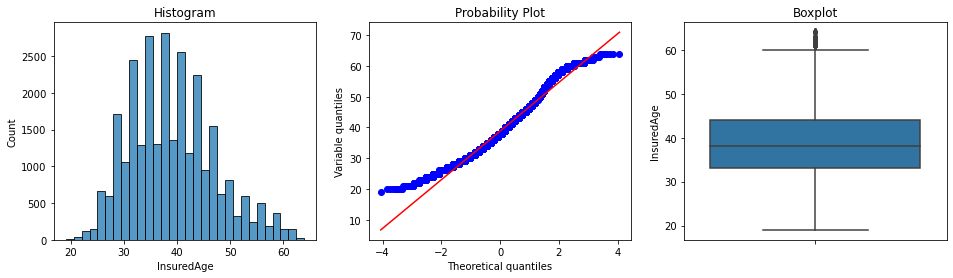

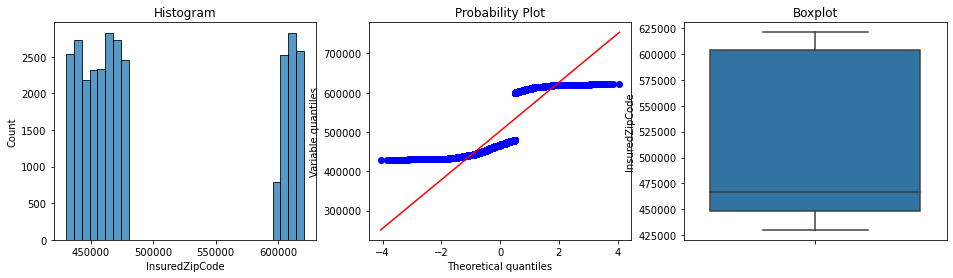

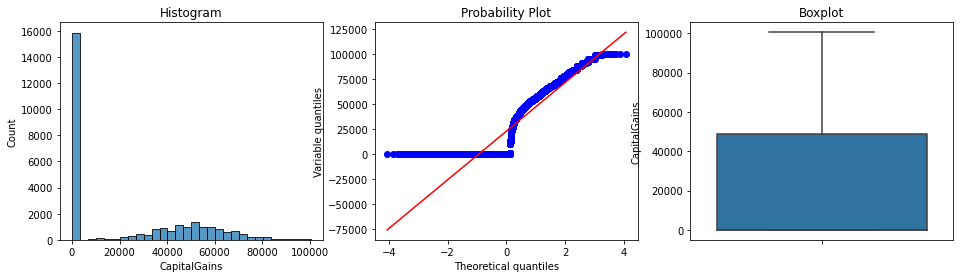

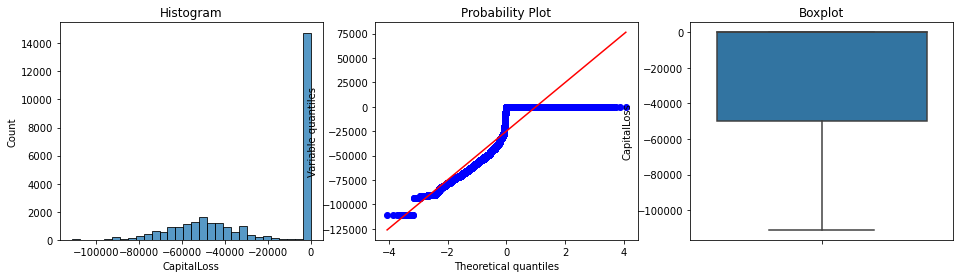

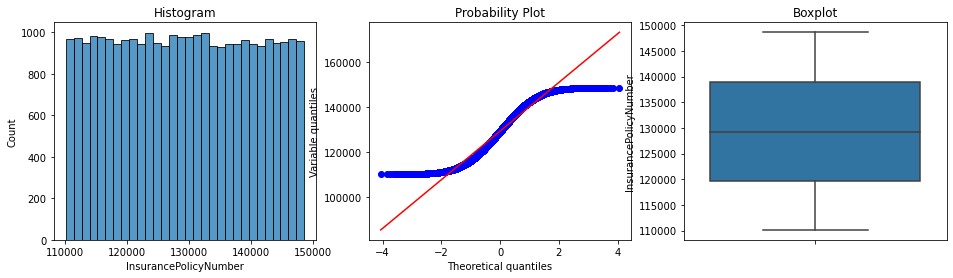

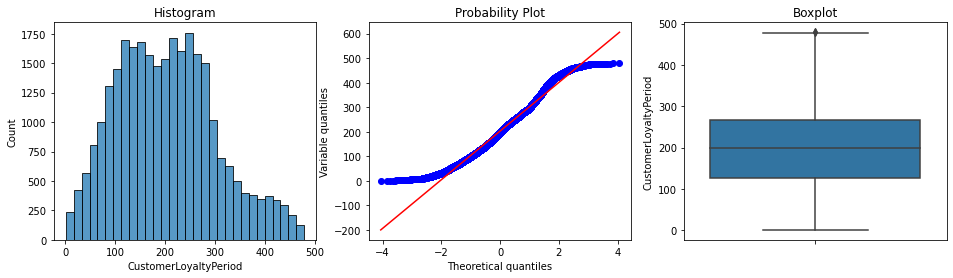

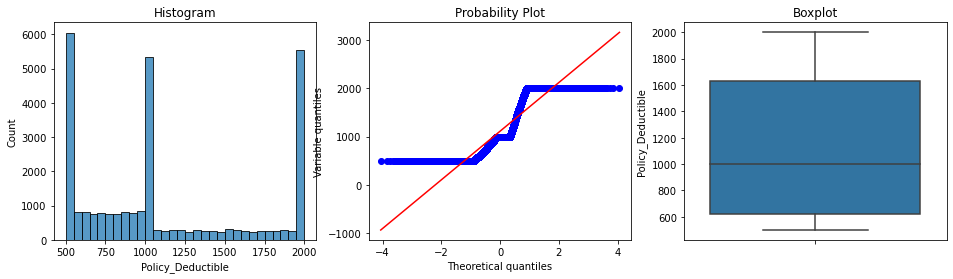

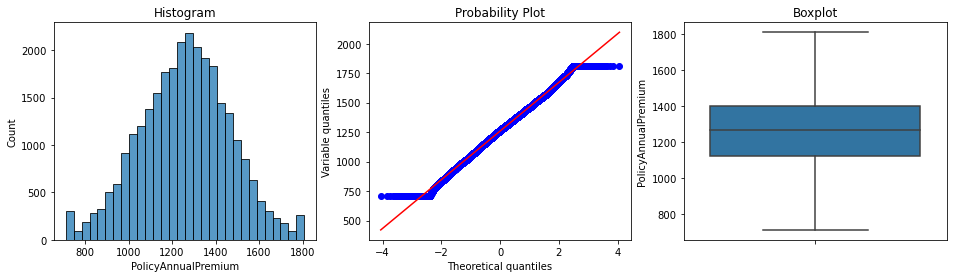

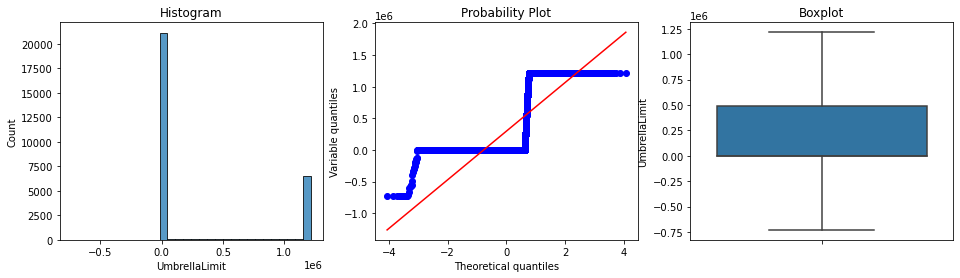

In [831]:
for feature in continuous_feature :

    diagnostic_plots(train_df_capping, feature)

In [832]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ReportedFraud,28836.0,0.269975,0.443954,0.00000,0.0000,0.000,1.000,1.000000e+00
DateOfIncident,28836.0,1.495110,0.516162,1.00000,1.0000,1.000,2.000,3.000000e+00
IncidentTime,28836.0,11.746047,6.170069,-5.00000,6.0000,12.000,17.000,2.300000e+01
NumberOfVehicles,28836.0,1.823207,0.980099,1.00000,1.0000,1.000,3.000,4.000000e+00
BodilyInjuries,28836.0,0.985782,0.784764,0.00000,0.0000,1.000,2.000,2.000000e+00
AmountOfInjuryClaim,28836.0,7335.905361,4424.156719,0.00000,4743.7500,7147.000,10571.250,1.931250e+04
AmountOfPropertyClaim,28836.0,7275.910320,4353.148869,0.00000,4862.0000,7051.000,10327.000,1.852450e+04
AmountOfVehicleDamage,28836.0,38083.894628,17220.973954,6179.50000,32193.2500,42457.500,49535.750,7.554950e+04
InsuredAge,28836.0,38.815370,7.996377,19.00000,33.0000,38.000,44.000,6.400000e+01
InsuredZipCode,28836.0,502436.579068,72250.868871,430104.00000,448603.0000,466691.000,603848.000,6.209620e+05


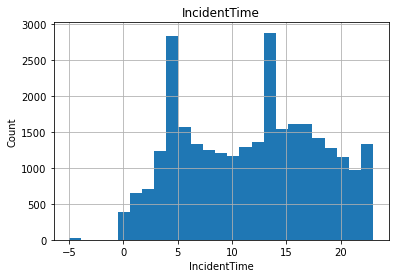

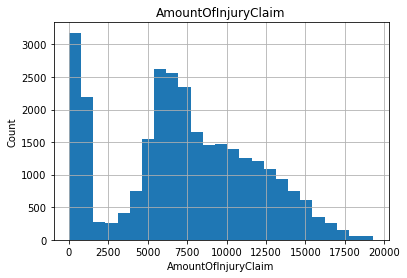

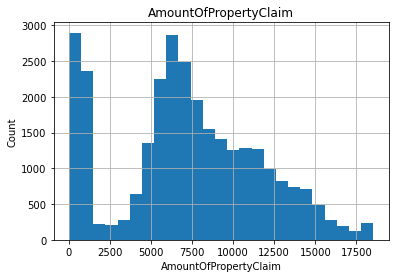

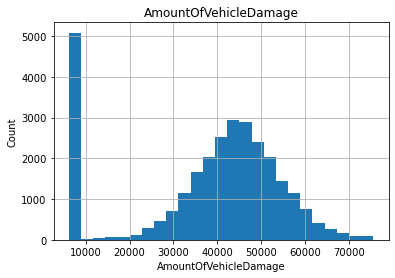

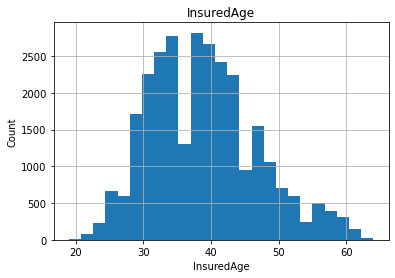

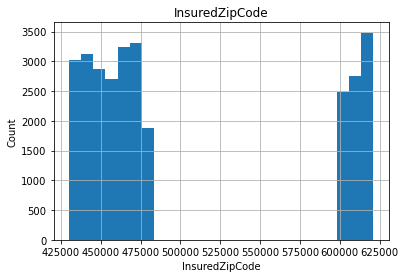

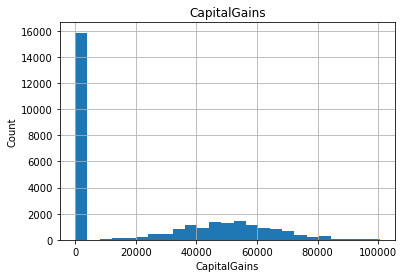

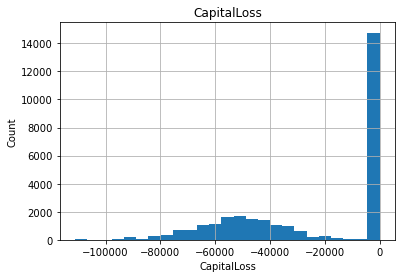

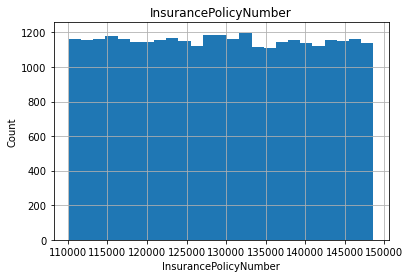

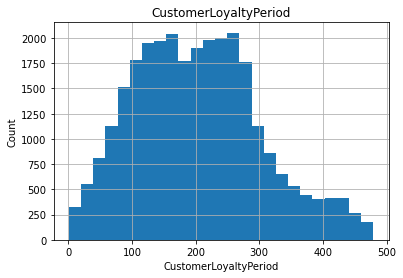

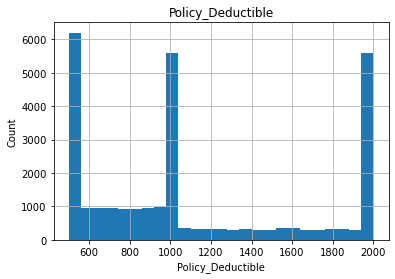

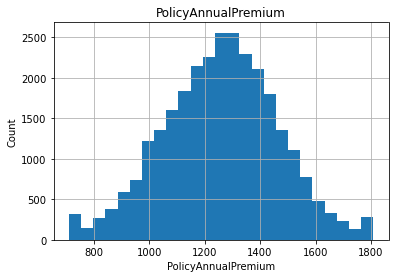

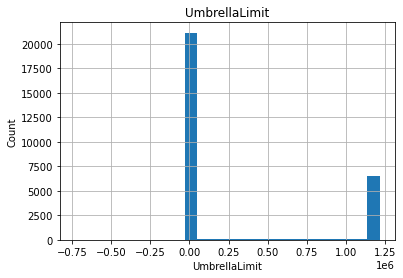

In [833]:

for feature in continuous_feature:
    data=train_df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Log normalization

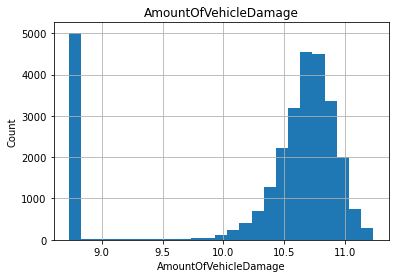

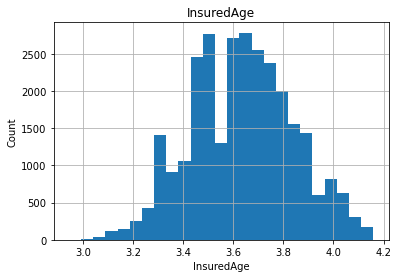

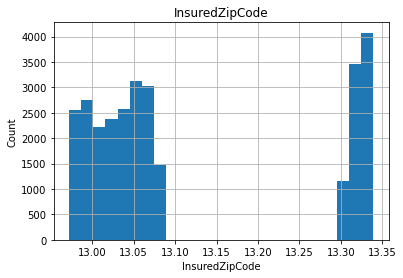

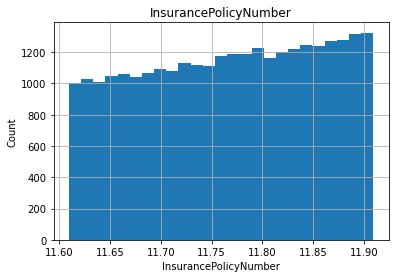

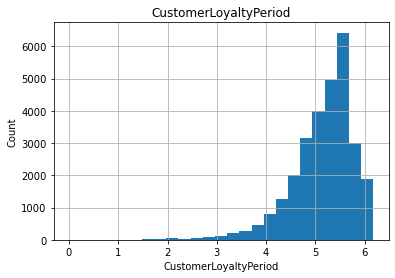

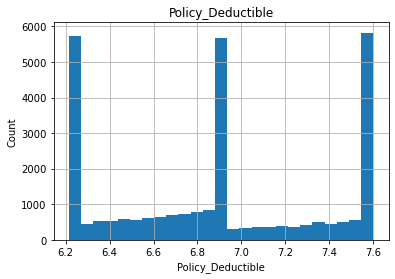

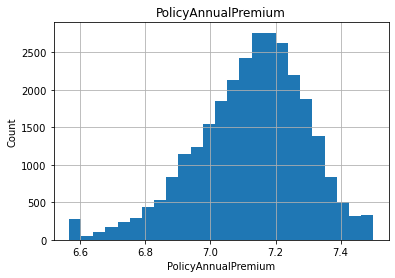

In [834]:
for feature in continuous_feature:
    data=train_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()
        

# Box plot

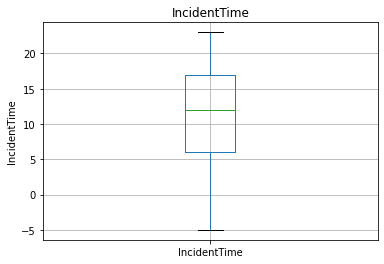

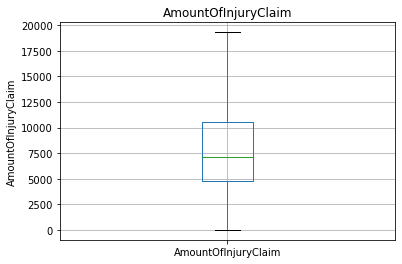

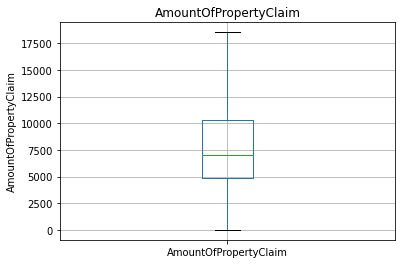

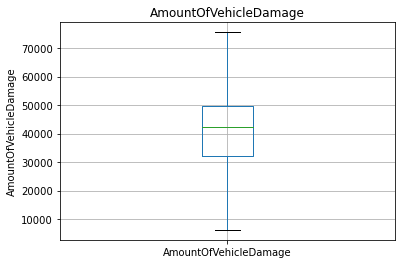

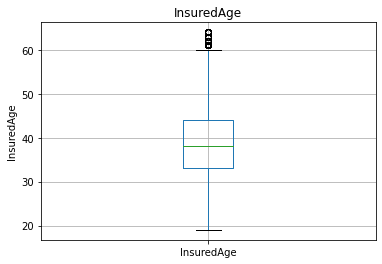

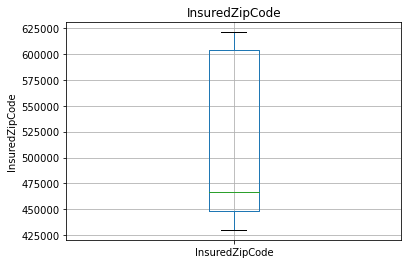

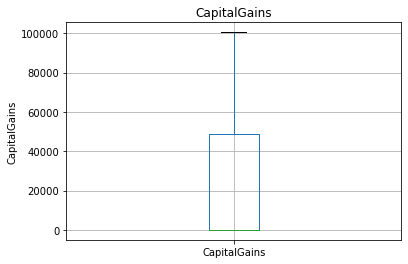

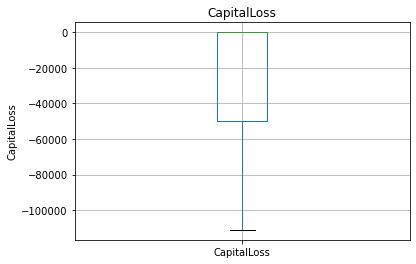

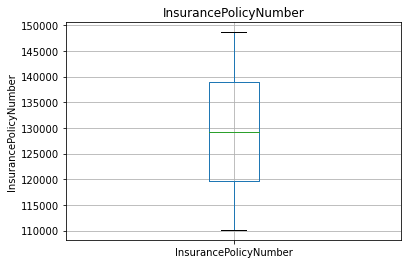

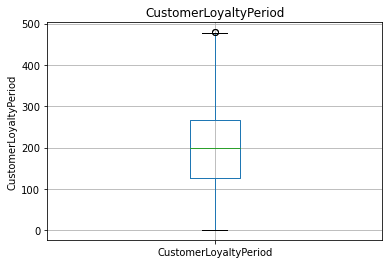

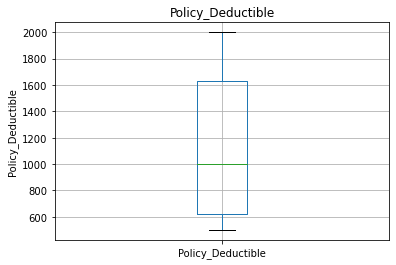

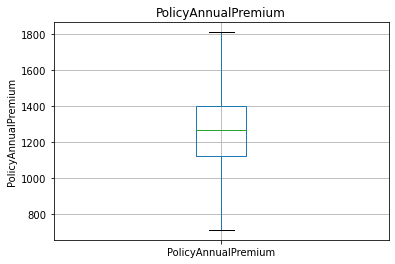

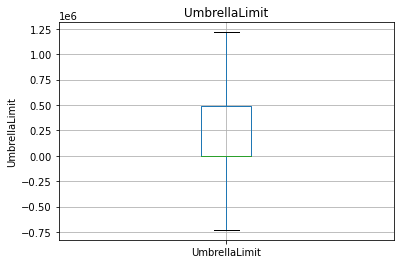

In [835]:
for feature in continuous_feature:
    data=train_df.copy()
    #if 0 in data[feature].unique():
      #  pass
    #else:
        #data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)       
    plt.title(feature)
    plt.show()

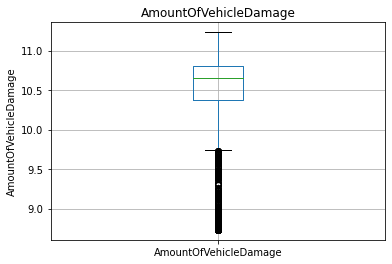

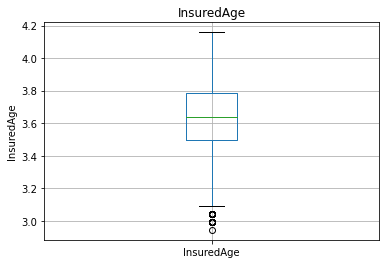

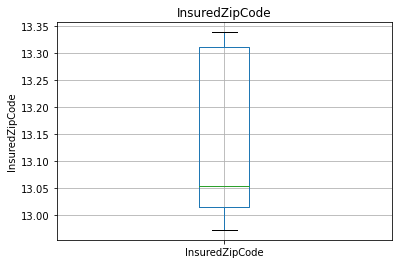

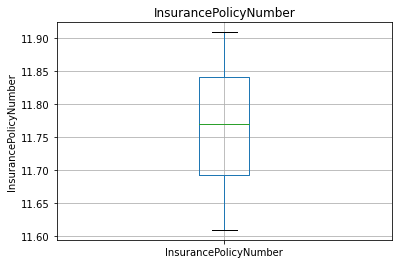

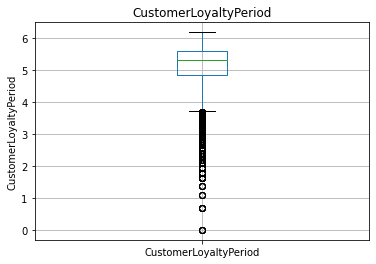

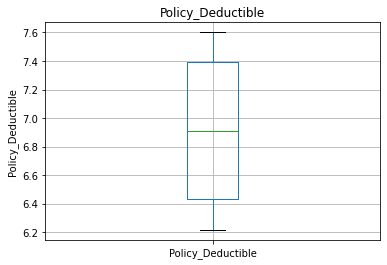

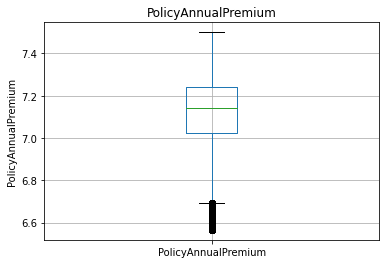

In [836]:
for feature in continuous_feature:
    data=train_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [837]:
cat_var = [feature for feature in cat_feature if feature not in date_col+['CustomerID','VehicleAttributeDetails1','IncidentAddress','AmountOfTotalClaim',]]
for col in cat_var:
    print(col)
    print(train_df[col].nunique())

TypeOfIncident
4
TypeOfCollission
3
SeverityOfIncident
4
AuthoritiesContacted
5
IncidentState
7
IncidentCity
7
PropertyDamage
2
Witnesses
5
PoliceReport
2
InsuredGender
2
InsuredEducationLevel
7
InsuredOccupation
14
InsuredHobbies
20
Country
1
InsurancePolicyState
3
Policy_CombinedSingleLimit
9
InsuredRelationship
6
VehicleAttribute1
1
VehicleAttribute2
1
VehicleAttributeDetails2
39
VehicleAttribute3
1
VehicleAttributeDetails3
15
VehicleAttribute4
1
VehicleAttributeDetails4
21


# Countplot for categorical features 

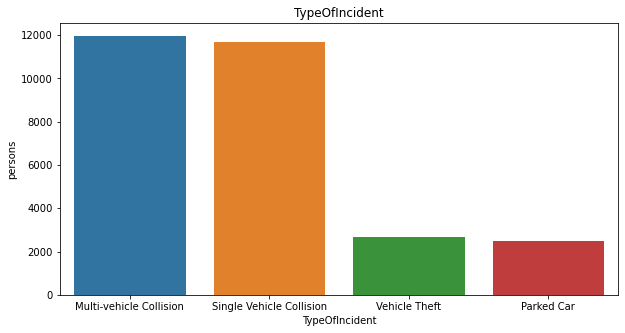

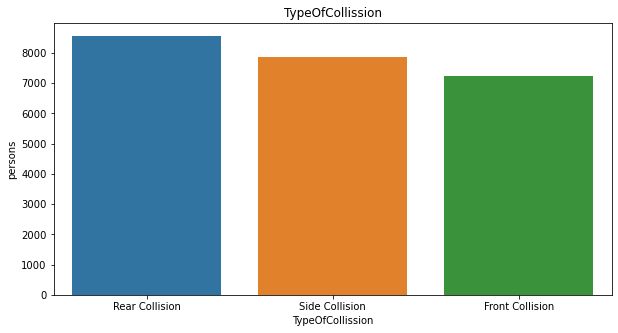

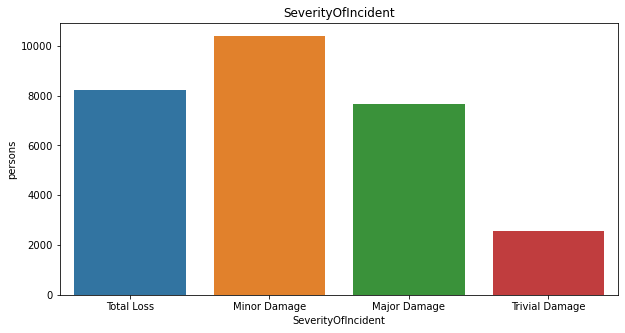

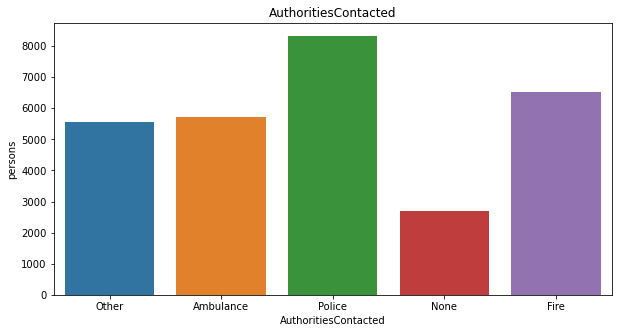

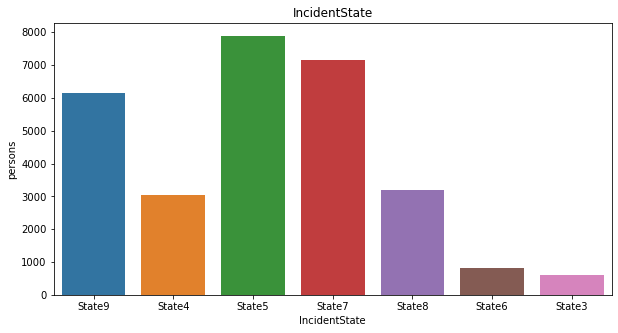

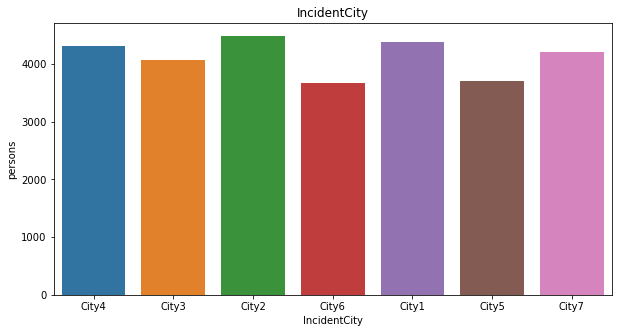

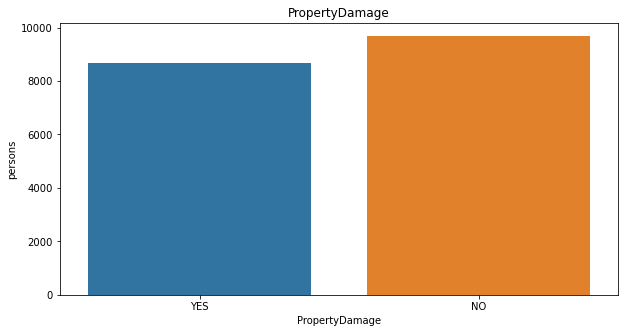

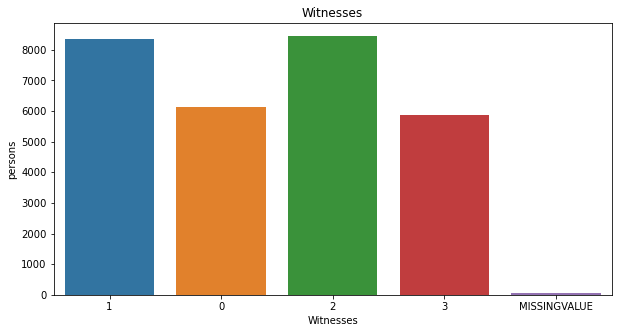

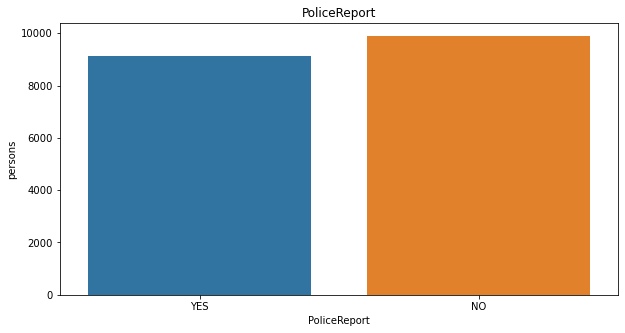

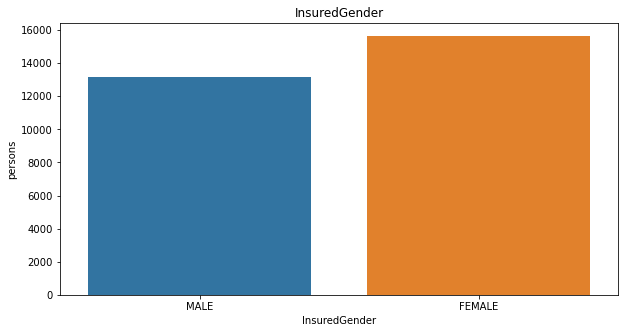

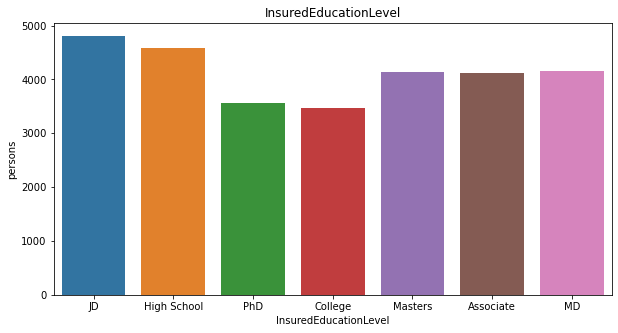

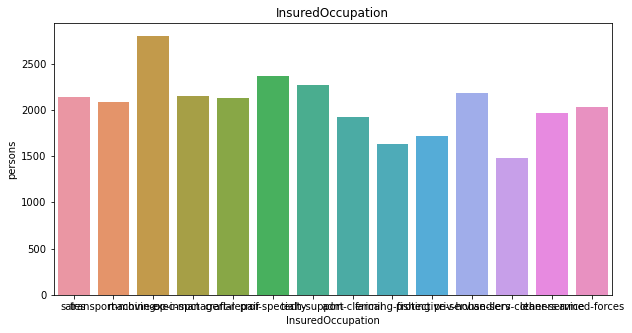

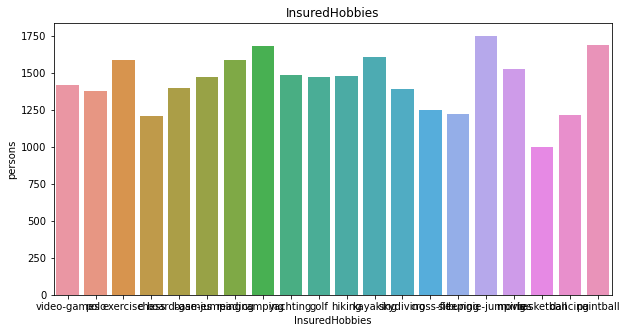

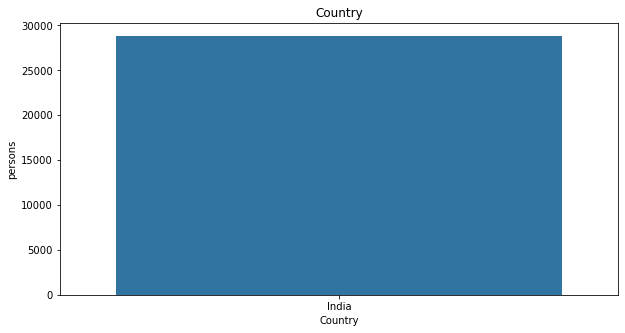

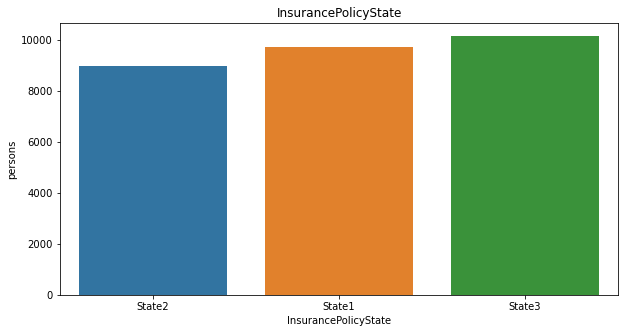

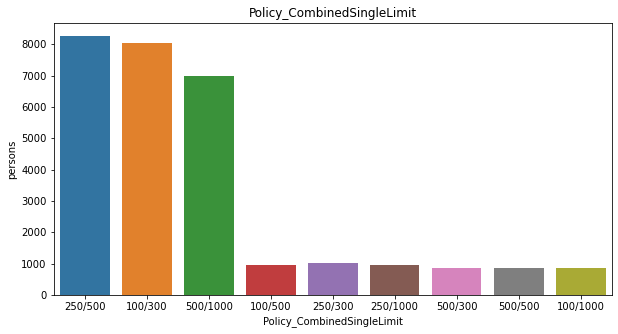

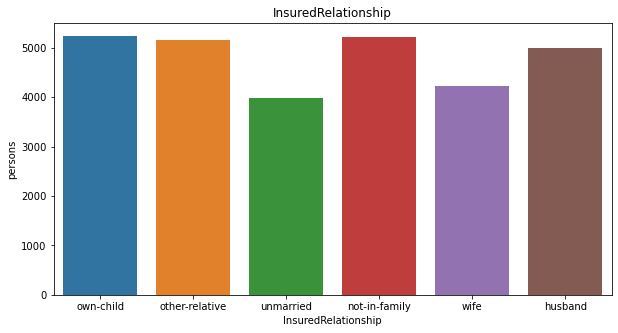

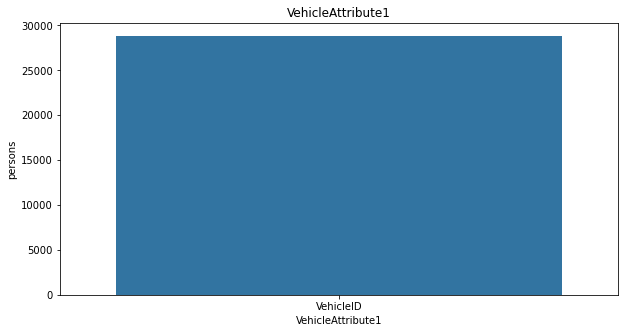

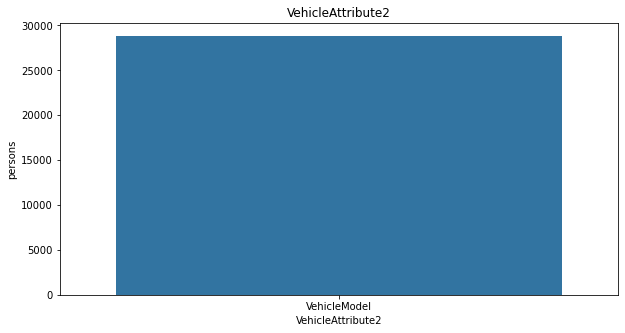

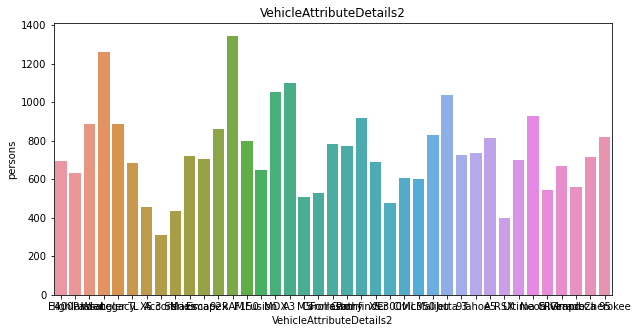

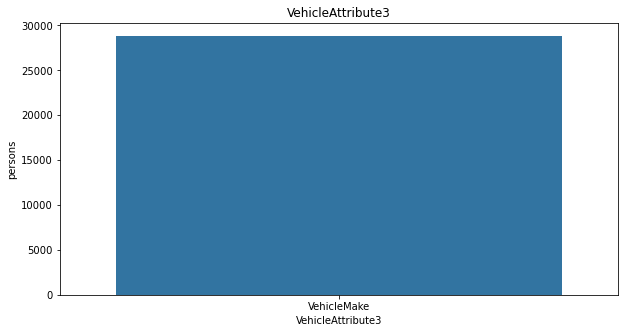

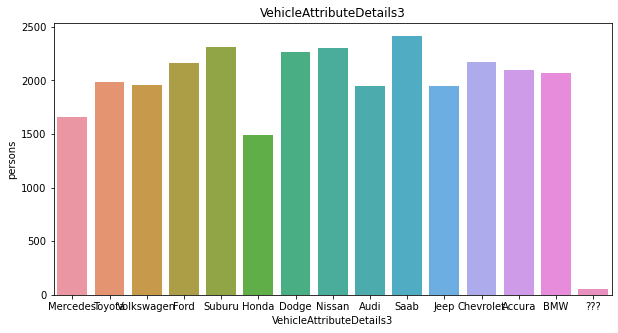

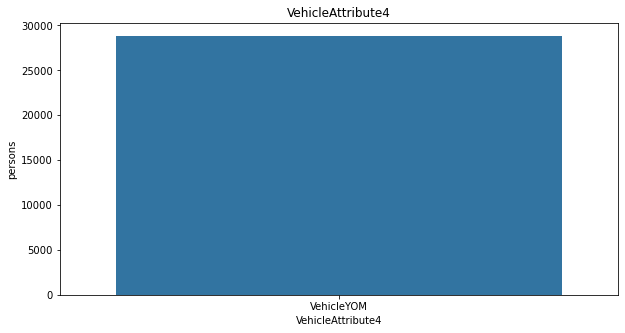

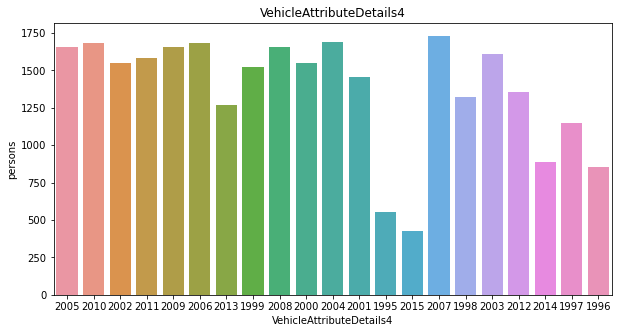

In [838]:
for col in cat_var :
    data = train_df.copy()
    plt.figure(figsize = (10,5))
    sns.countplot(x = col, data = train_df)
    plt.title(col)
    plt.ylabel('persons')
    plt.show()

In [839]:
first_dimension = "TypeOfIncident"
horizontal_label = "x label"
second_dimension = "ReportedFraud"

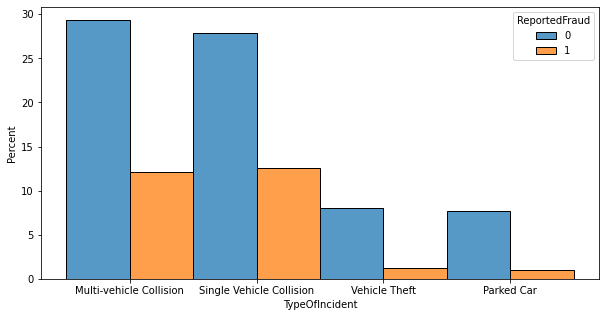

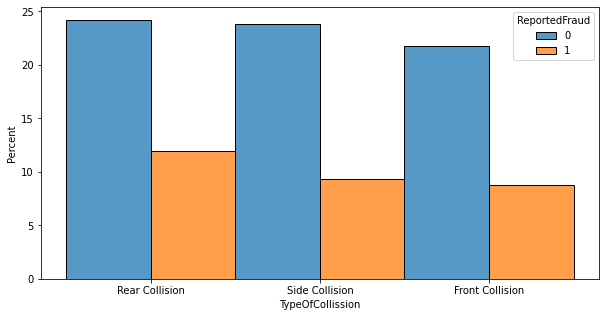

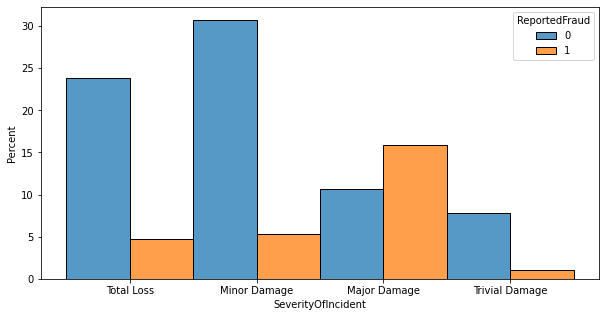

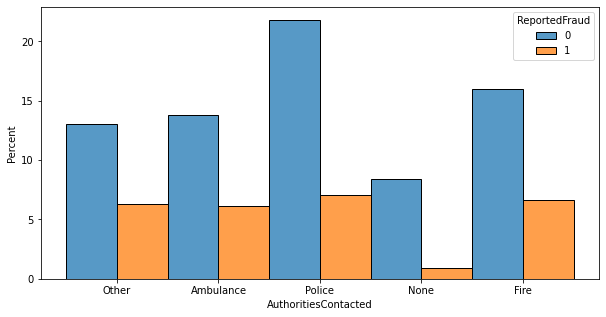

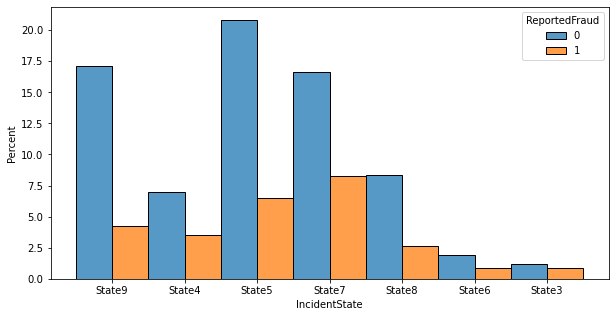

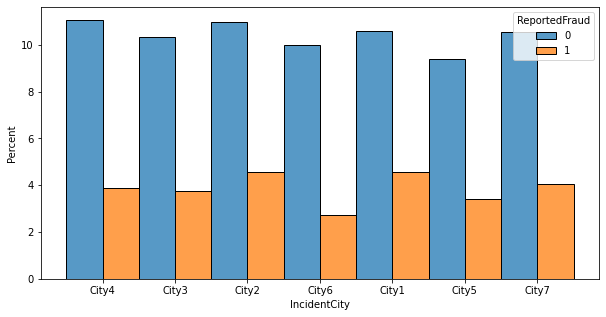

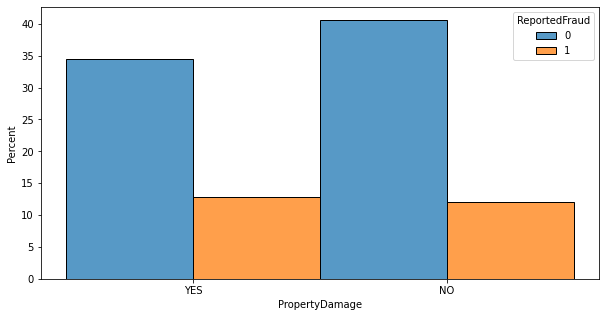

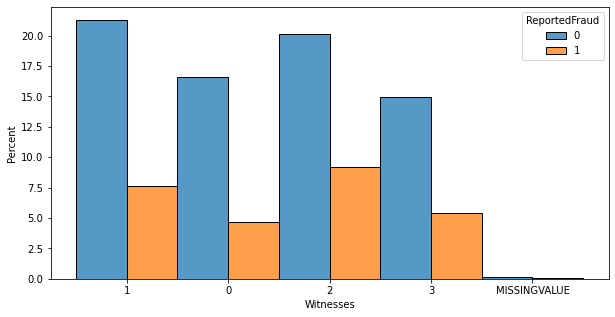

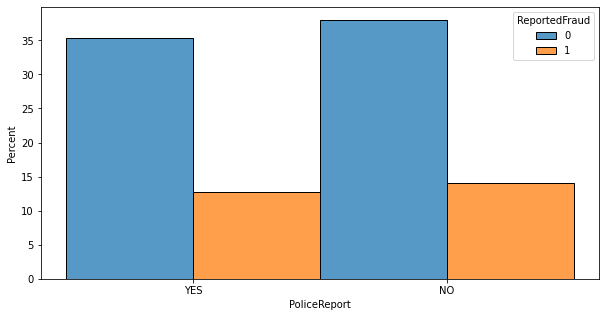

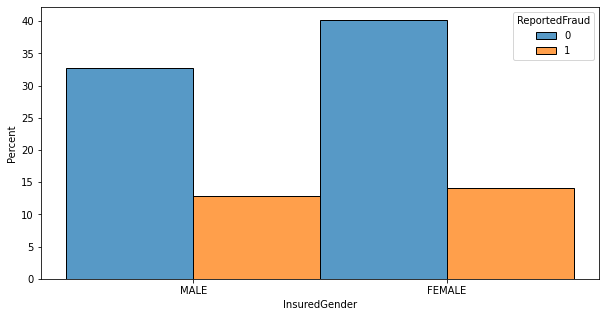

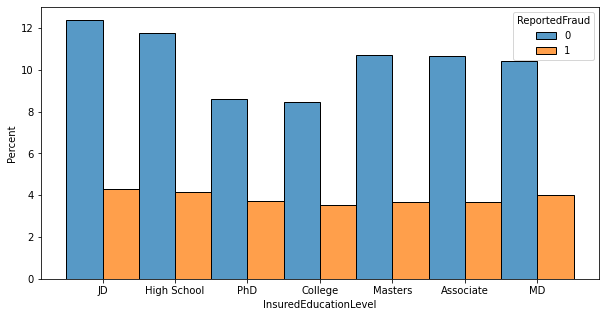

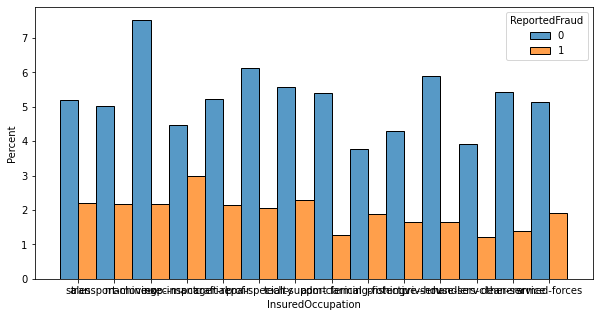

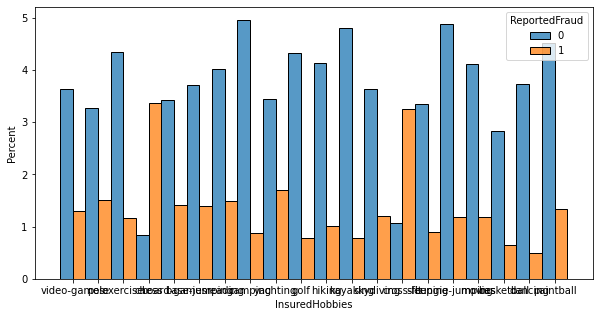

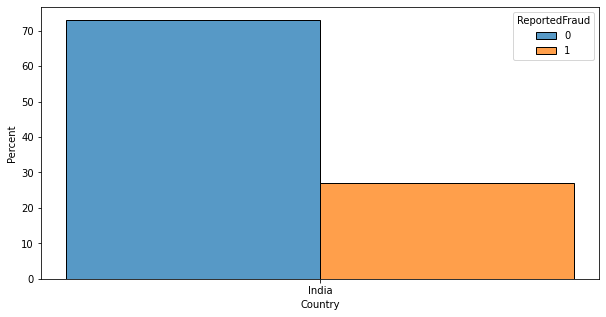

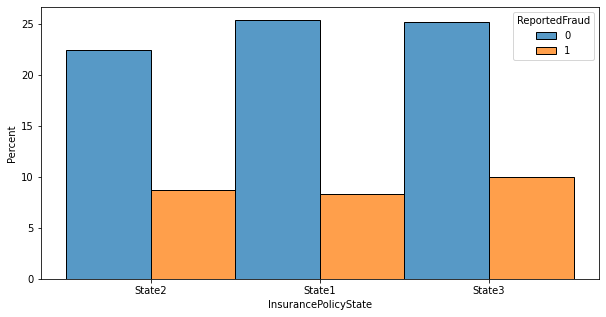

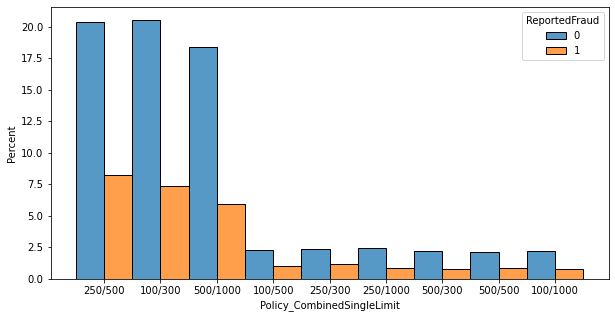

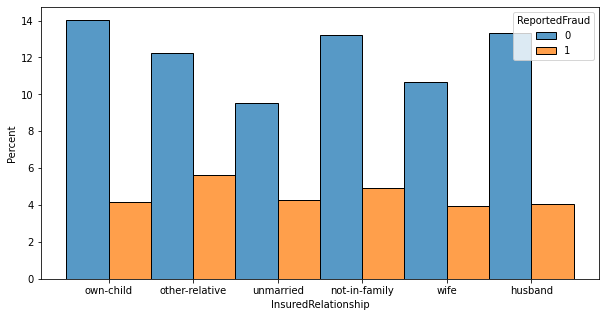

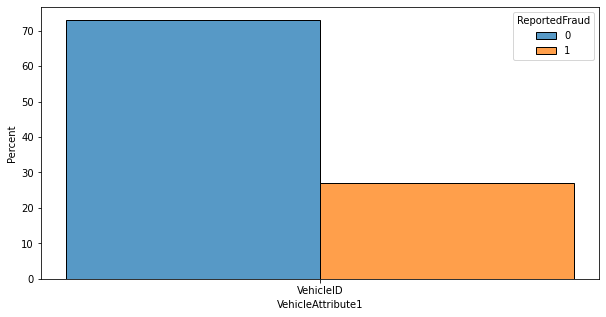

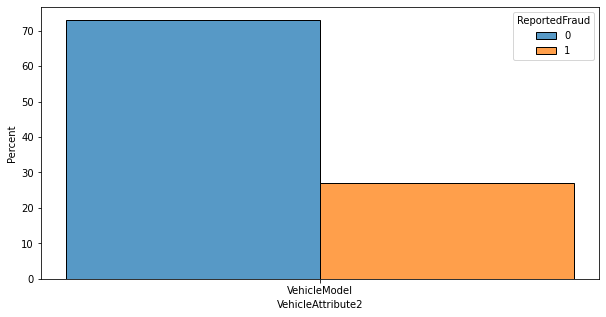

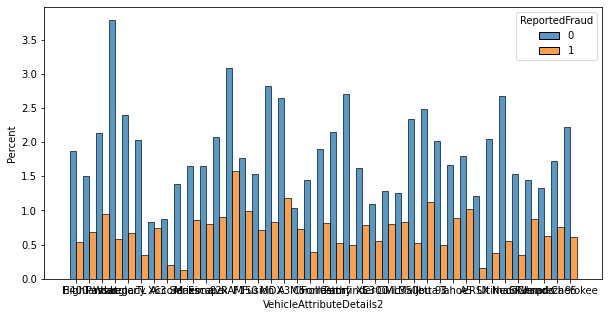

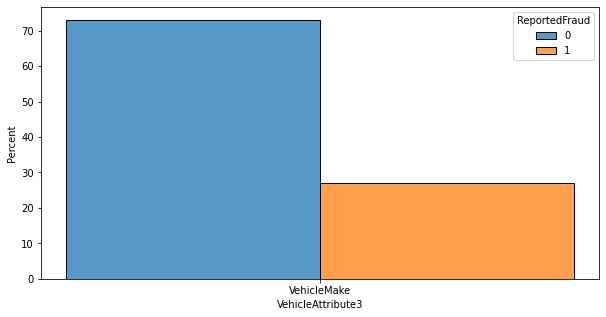

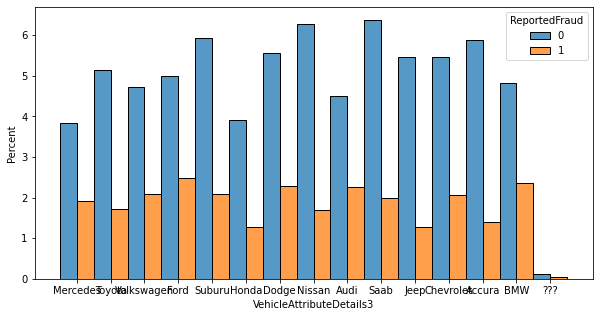

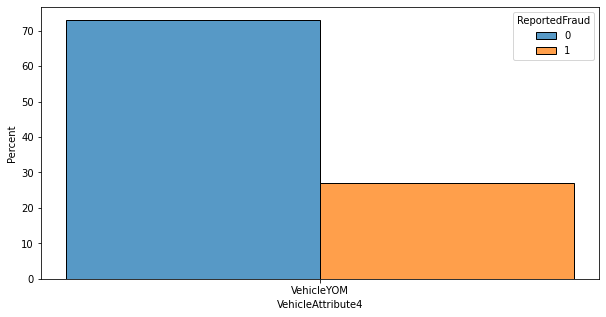

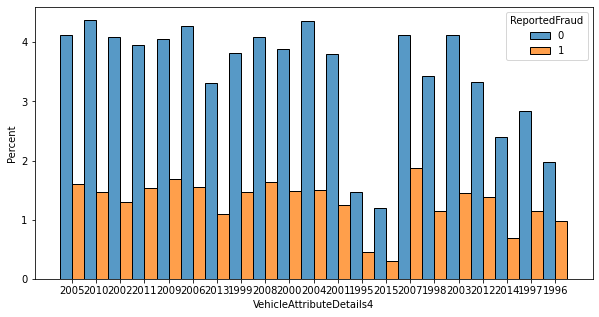

In [840]:
for feature in cat_var:
    
    plt.figure(figsize = (10,5))

    sns.histplot(binwidth=1,
    x= feature,
    hue="ReportedFraud",
    data=train_df,
    #hue_norm = True,
    stat="percent",
    
    multiple="dodge")

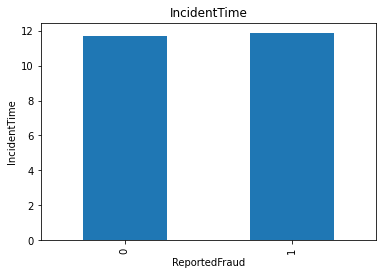

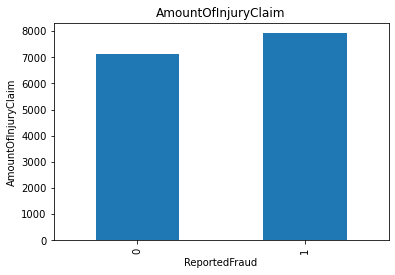

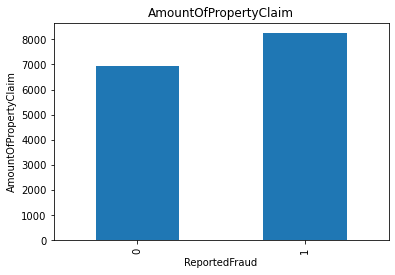

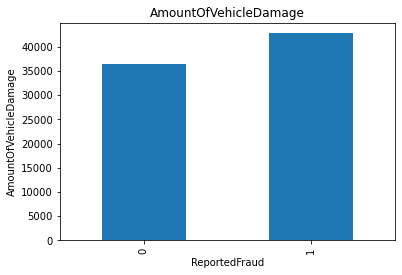

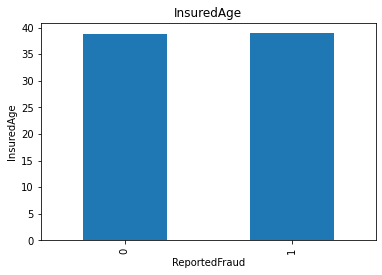

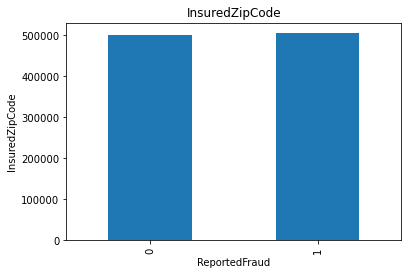

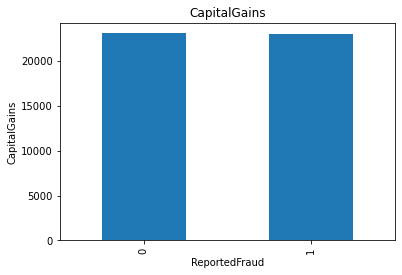

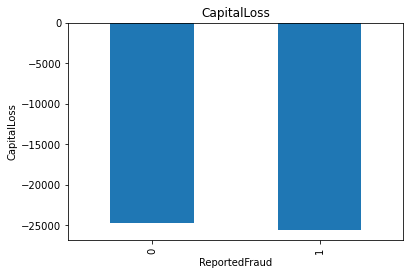

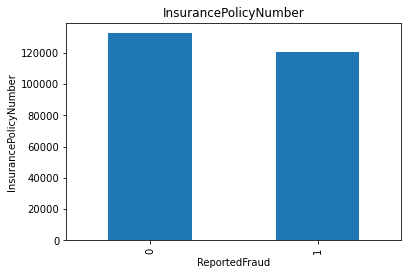

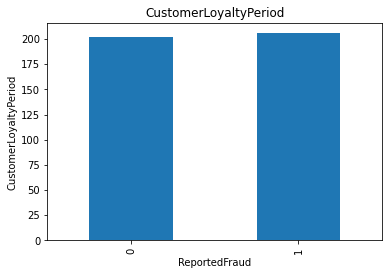

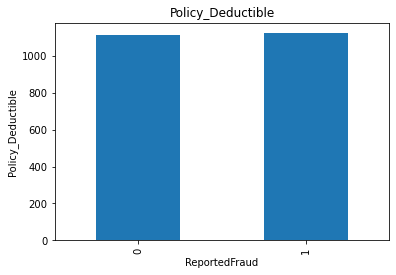

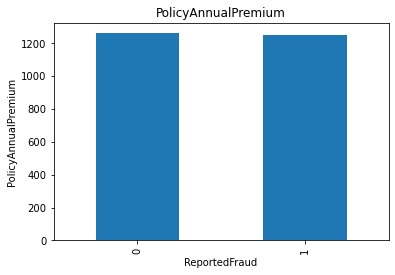

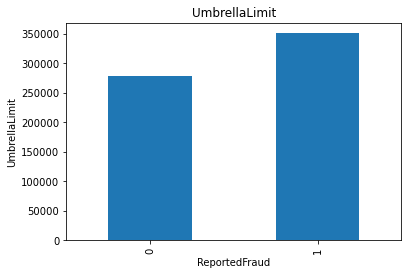

In [841]:

for feature in continuous_feature:
    data=train_df.copy()
    data.groupby('ReportedFraud')[feature].mean().plot.bar()
    plt.xlabel('ReportedFraud')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [842]:
a = train_df.groupby('ReportedFraud')['UmbrellaLimit']
for i , val in a:
    print(val.nunique())


880
433


In [845]:
train_df.head()

,CustomerID,ReportedFraud,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4
0,Cust20065,0,1,Multi-vehicle Collision,Rear Collision,Total Loss,Other,State9,City4,Location 1404,19,3,NaN,1,1,NaN,43973,9396.0,4698.0,29879.0,58,471784,MALE,JD,sales,video-games,0,-42700,India,129186,432,11,State2,250/500,2000,1142.87,0.0,own-child,VehicleID,Vehicle30662,VehicleModel,E400,VehicleMake,Mercedes,VehicleYOM,2005
1,Cust37589,0,2,Single Vehicle Collision,Side Collision,Minor Damage,Ambulance,State4,City3,Location 1675,14,1,NaN,1,1,YES,62310,6539.0,6539.0,49232.0,34,431937,FEMALE,High School,transport-moving,polo,51300,0,India,146710,128,8,State2,100/300,1000,1274.38,1214902.5,own-child,VehicleID,Vehicle17183,VehicleModel,Highlander,VehicleMake,Toyota,VehicleYOM,2010
2,Cust24312,0,1,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State5,City2,Location 1546,21,3,NaN,0,0,NaN,42824,6069.0,6069.0,30686.0,52,479320,FEMALE,PhD,machine-op-inspct,exercise,0,0,India,133433,346,6,State1,500/1000,745,1269.93,0.0,other-relative,VehicleID,Vehicle33982,VehicleModel,Passat,VehicleMake,Volkswagen,VehicleYOM,2002
3,Cust5493,1,1,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State7,City4,Location 1413,12,3,YES,2,0,NaN,45672,253.0,5741.0,39678.0,25,607763,FEMALE,College,exec-managerial,exercise,47400,-56100,India,114614,42,1,State2,100/300,986,1218.60,0.0,other-relative,VehicleID,Vehicle12299,VehicleModel,Highlander,VehicleMake,Toyota,VehicleYOM,2011
4,Cust7704,1,2,Multi-vehicle Collision,Side Collision,Major Damage,Other,State4,City6,Location 1367,3,3,NO,1,2,NO,81472,7407.0,14813.0,59252.0,27,441783,MALE,Masters,sales,chess,0,0,India,116825,109,9,State3,250/500,576,1431.02,1214902.5,unmarried,VehicleID,Vehicle30447,VehicleModel,Wrangler,VehicleMake,Ford,VehicleYOM,2010


In [846]:
train_df = train_df.replace({'ReportedFraud': {'Y': 1, 
                                'N': 0}})

In [1111]:
X = train_df.drop('ReportedFraud', axis = 1)
y = train_df['ReportedFraud']

In [1112]:
X.shape, y.shape

((28836, 45), (28836,))

# train_test_split

In [1035]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3,random_state=0, stratify= y)

In [1036]:
X_train.shape, X_test.shape

((20185, 45), (8651, 45))

In [1037]:
y_train.value_counts(normalize= True)

0    0.730047
1    0.269953
Name: ReportedFraud, dtype: float64

In [1038]:
y_test.value_counts(normalize=True)

0    0.729973
1    0.270027
Name: ReportedFraud, dtype: float64

In [1113]:
X_train.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4
13264,Cust21533,2,Multi-vehicle Collision,Side Collision,Total Loss,Ambulance,State5,City5,Location 1810,22,2,NO,0,3,YES,57486,11263.0,5827.0,40396.0,39,454176,FEMALE,JD,protective-serv,paintball,60300,-58900,India,130654,214,3,State3,250/500,1000,1255.78,0.0,own-child,VehicleID,Vehicle32182,VehicleModel,Wrangler,VehicleMake,Jeep,VehicleYOM,2008
20545,Cust1722,1,Parked Car,NaN,Trivial Damage,None,State5,City6,Location 1538,8,1,NaN,1,3,YES,5830,1060.0,1060.0,6179.5,34,442666,MALE,Masters,sales,kayaking,0,-41200,India,110843,130,3,State3,100/300,500,990.11,0.0,other-relative,VehicleID,Vehicle14781,VehicleModel,RAM,VehicleMake,Dodge,VehicleYOM,2015
25827,Cust5783,1,Single Vehicle Collision,Side Collision,Major Damage,Fire,State5,City5,Location 2024,6,1,NaN,0,2,NaN,64460,9917.0,9917.0,44626.0,42,619570,FEMALE,PhD,machine-op-inspct,yachting,28800,0,India,114904,260,7,State1,500/1000,2000,1407.21,1214902.5,other-relative,VehicleID,Vehicle20725,VehicleModel,Tahoe,VehicleMake,Chevrolet,VehicleYOM,2007
11138,Cust31786,2,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City3,Location 1920,18,1,NO,1,0,NO,72196,7285.0,10600.0,54311.0,33,440961,FEMALE,PhD,farming-fishing,base-jumping,0,0,India,140907,144,6,State3,100/300,1000,1019.19,0.0,husband,VehicleID,Vehicle30817,VehicleModel,TL,VehicleMake,Audi,VehicleYOM,2014
5378,Cust27051,2,Multi-vehicle Collision,Rear Collision,Minor Damage,Fire,State4,City3,Location 1661,2,3,NO,0,2,YES,46579,10204.0,7275.0,29100.0,31,459428,FEMALE,College,transport-moving,golf,67300,0,India,136172,27,2,State2,250/500,500,1207.37,1214902.5,not-in-family,VehicleID,Vehicle13963,VehicleModel,X5,VehicleMake,BMW,VehicleYOM,2012


In [1115]:
y_train.head()

13264    0
20545    0
25827    1
11138    0
5378     0
Name: ReportedFraud, dtype: int64

# Feature Engineering

In [1039]:
categorical_with_nan=[feature for feature in X_train.columns if X_train[feature].isnull().sum()>1 and X_train[feature].dtypes=='O']

for feature in categorical_with_nan:
    print("{}: {}% missing values".format(feature,np.round(X_train[feature].isnull().mean(),4)*100))

TypeOfCollission: 17.87% missing values
PropertyDamage: 36.3% missing values
PoliceReport: 34.32% missing values
InsuredGender: 0.09% missing values
Country: 0.01% missing values


In [1040]:
numerical_with_nan=[feature for feature in X_train.columns if X_train[feature].isnull().sum()>1 and X_train[feature].dtypes!='O']

for feature in numerical_with_nan:
    print("{}: {}% missing values".format(feature,np.round(X_train[feature].isnull().mean(),4)*100))

In [1041]:
X_train[num_feature].head().isnull().sum()

DateOfIncident           0
IncidentTime             0
NumberOfVehicles         0
BodilyInjuries           0
AmountOfInjuryClaim      0
AmountOfPropertyClaim    0
AmountOfVehicleDamage    0
InsuredAge               0
InsuredZipCode           0
CapitalGains             0
CapitalLoss              0
InsurancePolicyNumber    0
CustomerLoyaltyPeriod    0
DateOfPolicyCoverage     0
Policy_Deductible        0
PolicyAnnualPremium      0
UmbrellaLimit            0
dtype: int64

In [1042]:
cat_feature = [feature for feature in cat_feature if feature not in ['ReportedFraud']] 

In [1043]:
df_cat_train = X_train[cat_feature]
df_cat_test = X_test[cat_feature]
print(df_cat_train.shape)
print(df_cat_test.shape)

(20185, 28)
(8651, 28)


In [1044]:
df_cat_train.head()

,CustomerID,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,AmountOfTotalClaim,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Country,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4
13264,Cust21533,Multi-vehicle Collision,Side Collision,Total Loss,Ambulance,State5,City5,Location 1810,NO,3,YES,57486,FEMALE,JD,protective-serv,paintball,India,State3,250/500,own-child,VehicleID,Vehicle32182,VehicleModel,Wrangler,VehicleMake,Jeep,VehicleYOM,2008
20545,Cust1722,Parked Car,NaN,Trivial Damage,None,State5,City6,Location 1538,NaN,3,YES,5830,MALE,Masters,sales,kayaking,India,State3,100/300,other-relative,VehicleID,Vehicle14781,VehicleModel,RAM,VehicleMake,Dodge,VehicleYOM,2015
25827,Cust5783,Single Vehicle Collision,Side Collision,Major Damage,Fire,State5,City5,Location 2024,NaN,2,NaN,64460,FEMALE,PhD,machine-op-inspct,yachting,India,State1,500/1000,other-relative,VehicleID,Vehicle20725,VehicleModel,Tahoe,VehicleMake,Chevrolet,VehicleYOM,2007
11138,Cust31786,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City3,Location 1920,NO,0,NO,72196,FEMALE,PhD,farming-fishing,base-jumping,India,State3,100/300,husband,VehicleID,Vehicle30817,VehicleModel,TL,VehicleMake,Audi,VehicleYOM,2014
5378,Cust27051,Multi-vehicle Collision,Rear Collision,Minor Damage,Fire,State4,City3,Location 1661,NO,2,YES,46579,FEMALE,College,transport-moving,golf,India,State2,250/500,not-in-family,VehicleID,Vehicle13963,VehicleModel,X5,VehicleMake,BMW,VehicleYOM,2012


# Imputation

In [1045]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy="most_frequent")
cat_imputer.fit(df_cat_train)

df_cat_imp_train = pd.DataFrame(cat_imputer.transform(df_cat_train), columns=cat_feature)
df_cat_imp_test = pd.DataFrame(cat_imputer.transform(df_cat_test), columns=cat_feature)

In [1046]:
#df_cat_imp_train.isnull().sum()

In [1047]:
df_num_train = X_train[num_feature]
df_num_test = X_test[num_feature]
print(df_num_train.shape)
print(df_num_test.shape)

(20185, 17)
(8651, 17)


In [1048]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy="median")
num_imputer.fit(df_num_train)

df_num_imp_train = pd.DataFrame(num_imputer.transform(df_num_train), columns=num_feature)
df_num_imp_test =  pd.DataFrame(num_imputer.transform(df_num_test), columns=num_feature)

In [1049]:
X_train1 = pd.concat([df_cat_imp_train, df_num_imp_train], axis = 1)
X_test1 = pd.concat([df_cat_imp_test, df_num_imp_test], axis = 1)

In [1050]:
X_train1.head()

,CustomerID,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,AmountOfTotalClaim,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Country,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,Cust21533,Multi-vehicle Collision,Side Collision,Total Loss,Ambulance,State5,City5,Location 1810,NO,3,YES,57486,FEMALE,JD,protective-serv,paintball,India,State3,250/500,own-child,VehicleID,Vehicle32182,VehicleModel,Wrangler,VehicleMake,Jeep,VehicleYOM,2008,2.0,22.0,2.0,0.0,11263.0,5827.0,40396.0,39.0,454176.0,60300.0,-58900.0,130654.0,214.0,3.0,1000.0,1255.78,0.0
1,Cust1722,Parked Car,Rear Collision,Trivial Damage,None,State5,City6,Location 1538,NO,3,YES,5830,MALE,Masters,sales,kayaking,India,State3,100/300,other-relative,VehicleID,Vehicle14781,VehicleModel,RAM,VehicleMake,Dodge,VehicleYOM,2015,1.0,8.0,1.0,1.0,1060.0,1060.0,6179.5,34.0,442666.0,0.0,-41200.0,110843.0,130.0,3.0,500.0,990.11,0.0
2,Cust5783,Single Vehicle Collision,Side Collision,Major Damage,Fire,State5,City5,Location 2024,NO,2,NO,64460,FEMALE,PhD,machine-op-inspct,yachting,India,State1,500/1000,other-relative,VehicleID,Vehicle20725,VehicleModel,Tahoe,VehicleMake,Chevrolet,VehicleYOM,2007,1.0,6.0,1.0,0.0,9917.0,9917.0,44626.0,42.0,619570.0,28800.0,0.0,114904.0,260.0,7.0,2000.0,1407.21,1214902.5
3,Cust31786,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City3,Location 1920,NO,0,NO,72196,FEMALE,PhD,farming-fishing,base-jumping,India,State3,100/300,husband,VehicleID,Vehicle30817,VehicleModel,TL,VehicleMake,Audi,VehicleYOM,2014,2.0,18.0,1.0,1.0,7285.0,10600.0,54311.0,33.0,440961.0,0.0,0.0,140907.0,144.0,6.0,1000.0,1019.19,0.0
4,Cust27051,Multi-vehicle Collision,Rear Collision,Minor Damage,Fire,State4,City3,Location 1661,NO,2,YES,46579,FEMALE,College,transport-moving,golf,India,State2,250/500,not-in-family,VehicleID,Vehicle13963,VehicleModel,X5,VehicleMake,BMW,VehicleYOM,2012,2.0,2.0,3.0,0.0,10204.0,7275.0,29100.0,31.0,459428.0,67300.0,0.0,136172.0,27.0,2.0,500.0,1207.37,1214902.5


In [1051]:
X_train1.shape , X_test1.shape

((20185, 45), (8651, 45))

# Feature Selection

In [1052]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = train_df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                print(colname)
                col_corr.add(colname)
    return col_corr

In [1053]:
corr_features = correlation(X_train1, 0.95)
len(set(corr_features))

0

In [1054]:
num_var = [feature for feature in num_feature if feature not in ['CustomerLoyaltyPeriod']]

In [1055]:
X_train1.drop(corr_features,axis=1, inplace = True)
X_test1.drop(corr_features,axis=1, inplace = True)
X_train1.head()

,CustomerID,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,AmountOfTotalClaim,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Country,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,Cust21533,Multi-vehicle Collision,Side Collision,Total Loss,Ambulance,State5,City5,Location 1810,NO,3,YES,57486,FEMALE,JD,protective-serv,paintball,India,State3,250/500,own-child,VehicleID,Vehicle32182,VehicleModel,Wrangler,VehicleMake,Jeep,VehicleYOM,2008,2.0,22.0,2.0,0.0,11263.0,5827.0,40396.0,39.0,454176.0,60300.0,-58900.0,130654.0,214.0,3.0,1000.0,1255.78,0.0
1,Cust1722,Parked Car,Rear Collision,Trivial Damage,None,State5,City6,Location 1538,NO,3,YES,5830,MALE,Masters,sales,kayaking,India,State3,100/300,other-relative,VehicleID,Vehicle14781,VehicleModel,RAM,VehicleMake,Dodge,VehicleYOM,2015,1.0,8.0,1.0,1.0,1060.0,1060.0,6179.5,34.0,442666.0,0.0,-41200.0,110843.0,130.0,3.0,500.0,990.11,0.0
2,Cust5783,Single Vehicle Collision,Side Collision,Major Damage,Fire,State5,City5,Location 2024,NO,2,NO,64460,FEMALE,PhD,machine-op-inspct,yachting,India,State1,500/1000,other-relative,VehicleID,Vehicle20725,VehicleModel,Tahoe,VehicleMake,Chevrolet,VehicleYOM,2007,1.0,6.0,1.0,0.0,9917.0,9917.0,44626.0,42.0,619570.0,28800.0,0.0,114904.0,260.0,7.0,2000.0,1407.21,1214902.5
3,Cust31786,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City3,Location 1920,NO,0,NO,72196,FEMALE,PhD,farming-fishing,base-jumping,India,State3,100/300,husband,VehicleID,Vehicle30817,VehicleModel,TL,VehicleMake,Audi,VehicleYOM,2014,2.0,18.0,1.0,1.0,7285.0,10600.0,54311.0,33.0,440961.0,0.0,0.0,140907.0,144.0,6.0,1000.0,1019.19,0.0
4,Cust27051,Multi-vehicle Collision,Rear Collision,Minor Damage,Fire,State4,City3,Location 1661,NO,2,YES,46579,FEMALE,College,transport-moving,golf,India,State2,250/500,not-in-family,VehicleID,Vehicle13963,VehicleModel,X5,VehicleMake,BMW,VehicleYOM,2012,2.0,2.0,3.0,0.0,10204.0,7275.0,29100.0,31.0,459428.0,67300.0,0.0,136172.0,27.0,2.0,500.0,1207.37,1214902.5


In [1056]:
print(len(X_train1.columns)), print(len(X_test1.columns))

45
45


(None, None)

In [1099]:
from feature_engine.selection import DropDuplicateFeatures
from feature_engine.selection import DropCorrelatedFeatures
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.selection import SelectByShuffling

In [1058]:
transformer = DropDuplicateFeatures()


In [1059]:
transformer.fit(X_train1)


DropDuplicateFeatures()

In [1060]:
train_t = transformer.transform(X_train1)
train_t.columns

Index(['CustomerID', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'Witnesses',
       'PoliceReport', 'AmountOfTotalClaim', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'Country', 'InsurancePolicyState', 'Policy_CombinedSingleLimit',
       'InsuredRelationship', 'VehicleAttribute1', 'VehicleAttributeDetails1',
       'VehicleAttribute2', 'VehicleAttributeDetails2', 'VehicleAttribute3',
       'VehicleAttributeDetails3', 'VehicleAttribute4',
       'VehicleAttributeDetails4', 'DateOfIncident', 'IncidentTime',
       'NumberOfVehicles', 'BodilyInjuries', 'AmountOfInjuryClaim',
       'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'InsuredAge',
       'InsuredZipCode', 'CapitalGains', 'CapitalLoss',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'Policy_Deductible', 'PolicyA

In [1079]:
transformer.duplicated_feature_sets_
transformer.features_to_drop_

set()

In [1073]:
tr = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.8)

In [1074]:
Xt = tr.fit_transform(X_train1)

In [1075]:
tr.correlated_feature_sets_

[{'CustomerLoyaltyPeriod', 'InsuredAge'}]

In [1087]:
drop_corr = tr.features_to_drop_
(dropcorr)

{'CustomerLoyaltyPeriod'}

In [1086]:
X_train1.drop(drop_corr,axis=1, inplace = True)
X_test1.drop(drop_corr,axis=1, inplace = True)
X_train1.head()

,CustomerID,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,AmountOfTotalClaim,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Country,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,Cust21533,Multi-vehicle Collision,Side Collision,Total Loss,Ambulance,State5,City5,Location 1810,NO,3,YES,57486,FEMALE,JD,protective-serv,paintball,India,State3,250/500,own-child,VehicleID,Vehicle32182,VehicleModel,Wrangler,VehicleMake,Jeep,VehicleYOM,2008,2.0,22.0,2.0,0.0,11263.0,5827.0,40396.0,39.0,454176.0,60300.0,-58900.0,130654.0,3.0,1000.0,1255.78,0.0
1,Cust1722,Parked Car,Rear Collision,Trivial Damage,None,State5,City6,Location 1538,NO,3,YES,5830,MALE,Masters,sales,kayaking,India,State3,100/300,other-relative,VehicleID,Vehicle14781,VehicleModel,RAM,VehicleMake,Dodge,VehicleYOM,2015,1.0,8.0,1.0,1.0,1060.0,1060.0,6179.5,34.0,442666.0,0.0,-41200.0,110843.0,3.0,500.0,990.11,0.0
2,Cust5783,Single Vehicle Collision,Side Collision,Major Damage,Fire,State5,City5,Location 2024,NO,2,NO,64460,FEMALE,PhD,machine-op-inspct,yachting,India,State1,500/1000,other-relative,VehicleID,Vehicle20725,VehicleModel,Tahoe,VehicleMake,Chevrolet,VehicleYOM,2007,1.0,6.0,1.0,0.0,9917.0,9917.0,44626.0,42.0,619570.0,28800.0,0.0,114904.0,7.0,2000.0,1407.21,1214902.5
3,Cust31786,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City3,Location 1920,NO,0,NO,72196,FEMALE,PhD,farming-fishing,base-jumping,India,State3,100/300,husband,VehicleID,Vehicle30817,VehicleModel,TL,VehicleMake,Audi,VehicleYOM,2014,2.0,18.0,1.0,1.0,7285.0,10600.0,54311.0,33.0,440961.0,0.0,0.0,140907.0,6.0,1000.0,1019.19,0.0
4,Cust27051,Multi-vehicle Collision,Rear Collision,Minor Damage,Fire,State4,City3,Location 1661,NO,2,YES,46579,FEMALE,College,transport-moving,golf,India,State2,250/500,not-in-family,VehicleID,Vehicle13963,VehicleModel,X5,VehicleMake,BMW,VehicleYOM,2012,2.0,2.0,3.0,0.0,10204.0,7275.0,29100.0,31.0,459428.0,67300.0,0.0,136172.0,2.0,500.0,1207.37,1214902.5


In [1091]:
var = [feature for feature in X_train1.columns if 'CustomerLoyaltyPeriod' in feature  ]
var

[]

In [1095]:
tr = SmartCorrelatedSelection(
    variables=None,
    method="pearson",
    threshold=0.8,
    missing_values="raise",
    selection_method="variance",
    estimator=None,
)

Xt = tr.fit_transform(X_train1)

tr.correlated_feature_sets_
tr.features_to_drop_

[]

In [1108]:
X_train.shape, y_train.shape

((20185, 45), (20185,))

In [1117]:
y = pd.DataFrame(y_train)
y.head()

,ReportedFraud
13264,0
20545,0
25827,1
11138,0
5378,0


In [1109]:
from feature_engine.selection import SelectByShuffling
logistic_model = LogisticRegression()

In [1122]:
tr = SelectByShuffling(estimator=logistic_model, scoring="accuracy", cv=3)
Xt = tr.fit_transform(X_train1, y)

In [1123]:
tr.initial_model_performance_

0.7554617595399779

In [1124]:
tr.performance_drifts_


{'DateOfIncident': 0.0,
 'IncidentTime': 0.0,
 'NumberOfVehicles': 0.0,
 'BodilyInjuries': 0.0,
 'AmountOfInjuryClaim': 0.0029229748816462786,
 'AmountOfPropertyClaim': 0.0009412071448249293,
 'AmountOfVehicleDamage': 0.02412690305218157,
 'InsuredAge': -4.9544193420514304e-05,
 'InsuredZipCode': 0.004458734435878298,
 'CapitalGains': 0.00019807369466473546,
 'CapitalLoss': -0.00039633882179024305,
 'InsurancePolicyNumber': 0.055684956536290686,
 'DateOfPolicyCoverage': 0.0,
 'Policy_Deductible': -0.00193198057143118,
 'PolicyAnnualPremium': -0.0013375975061238332,
 'UmbrellaLimit': 0.004458756524239216}

In [1126]:
tr.features_to_drop_


['DateOfIncident',
 'IncidentTime',
 'NumberOfVehicles',
 'BodilyInjuries',
 'AmountOfInjuryClaim',
 'AmountOfPropertyClaim',
 'InsuredAge',
 'InsuredZipCode',
 'CapitalGains',
 'CapitalLoss',
 'DateOfPolicyCoverage',
 'Policy_Deductible',
 'PolicyAnnualPremium',
 'UmbrellaLimit']

In [1128]:

(Xt.head())


,CustomerID,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,AmountOfTotalClaim,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Country,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4,AmountOfVehicleDamage,InsurancePolicyNumber
0,Cust21533,Multi-vehicle Collision,Side Collision,Total Loss,Ambulance,State5,City5,Location 1810,NO,3,YES,57486,FEMALE,JD,protective-serv,paintball,India,State3,250/500,own-child,VehicleID,Vehicle32182,VehicleModel,Wrangler,VehicleMake,Jeep,VehicleYOM,2008,40396.0,130654.0
1,Cust1722,Parked Car,Rear Collision,Trivial Damage,None,State5,City6,Location 1538,NO,3,YES,5830,MALE,Masters,sales,kayaking,India,State3,100/300,other-relative,VehicleID,Vehicle14781,VehicleModel,RAM,VehicleMake,Dodge,VehicleYOM,2015,6179.5,110843.0
2,Cust5783,Single Vehicle Collision,Side Collision,Major Damage,Fire,State5,City5,Location 2024,NO,2,NO,64460,FEMALE,PhD,machine-op-inspct,yachting,India,State1,500/1000,other-relative,VehicleID,Vehicle20725,VehicleModel,Tahoe,VehicleMake,Chevrolet,VehicleYOM,2007,44626.0,114904.0
3,Cust31786,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City3,Location 1920,NO,0,NO,72196,FEMALE,PhD,farming-fishing,base-jumping,India,State3,100/300,husband,VehicleID,Vehicle30817,VehicleModel,TL,VehicleMake,Audi,VehicleYOM,2014,54311.0,140907.0
4,Cust27051,Multi-vehicle Collision,Rear Collision,Minor Damage,Fire,State4,City3,Location 1661,NO,2,YES,46579,FEMALE,College,transport-moving,golf,India,State2,250/500,not-in-family,VehicleID,Vehicle13963,VehicleModel,X5,VehicleMake,BMW,VehicleYOM,2012,29100.0,136172.0


In [1129]:
y = pd.DataFrame(y_smote)
y.head()

,ReportedFraud
0,0
1,0
2,1
3,0
4,0


In [1131]:
tr = SelectByShuffling(estimator=logistic_model, scoring="accuracy", cv=3)
Xt = tr.fit_transform(x_smote, y)


In [1132]:
tr.initial_model_performance_


0.8557274701411508

In [1133]:
tr.performance_drifts_


{'col_0': 0.10470955483170463,
 'col_1': 0.046925895765472014,
 'col_2': 0.04410966340933753,
 'col_3': 0.04397394136807797,
 'col_4': 0.1152619435396307,
 'IncidentState_0': 0.0038680781758956284,
 'IncidentState_1': 0.00010179153094436177,
 'IncidentState_2': 0.001594733984799035,
 'IncidentCity_0': -0.0010518458197612546,
 'IncidentCity_1': 0.000373235613463474,
 'IncidentCity_2': -0.0008482627578719759,
 'IncidentAddress_0': 0.00196796959826262,
 'IncidentAddress_1': 0.00016965255157419534,
 'IncidentAddress_2': -0.00027144408251922325,
 'IncidentAddress_3': 0.0005768186753526416,
 'IncidentAddress_4': 0.0018322475570031749,
 'IncidentAddress_5': 0.0008482627578718649,
 'IncidentAddress_6': 0.0012554288816502002,
 'IncidentAddress_7': -0.0011536373507059494,
 'IncidentAddress_8': -0.0012893593919653945,
 'IncidentAddress_9': -0.0008143322475571146,
 'InsuredEducationLevel_0': 0.0007125407166123088,
 'InsuredEducationLevel_1': 0.0020358306188924535,
 'InsuredEducationLevel_2': 0.000

In [1136]:
len(x_smote.columns)

71

In [1137]:
len(tr.features_to_drop_)


57

In [1138]:
Xt.head()

,col_0,col_1,col_2,col_3,col_4,AmountOfVehicleDamage,InsurancePolicyNumber,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,Witnesses_2,Witnesses_1,Witnesses_0,Witnesses_3
0,0,0,1,0,0,0.130521,0.123199,0.0,1.0,0.0,0,0,0,1
1,1,0,0,0,0,-1.852755,-1.657166,0.0,0.0,1.0,0,0,0,1
2,1,0,0,0,0,0.375703,-1.292214,0.0,0.0,0.0,1,0,0,0
3,0,1,0,0,0,0.937071,1.044610,0.0,1.0,0.0,0,0,1,0
4,0,0,0,1,0,-0.524224,0.619088,1.0,0.0,0.0,1,0,0,0


In [1142]:
test_new = [feature for feature in Xt.columns ]
len(test_new)

14

In [1144]:
X_new = X_test5[test_new]
X_new.head()

,col_0,col_1,col_2,col_3,col_4,AmountOfVehicleDamage,InsurancePolicyNumber,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,Witnesses_2,Witnesses_1,Witnesses_0,Witnesses_3
0,0,1,0,0,0,-0.011081,-0.841888,0.0,1.0,0.0,0,1,0,0
1,0,1,0,0,0,0.409379,0.723244,1.0,0.0,0.0,0,0,1,0
2,0,0,0,0,1,0.413900,-0.646516,1.0,0.0,0.0,0,0,1,0
3,1,0,0,0,0,1.232216,-0.657121,1.0,0.0,0.0,1,0,0,0
4,0,1,0,0,0,-1.852755,-0.498505,1.0,0.0,0.0,0,0,1,0


In [1139]:
Xt.shape, y_smote.shape

((29472, 14), (29472,))

In [1145]:
clf_rf = RandomForestClassifier(n_estimators=100)

clf_rf.fit(X=Xt, y=y_smote)

y_pred_train = clf_rf.predict(Xt)
print("Train Accuracy:",accuracy_score(y_smote,y_pred_train))

y_pred_test = clf_rf.predict(X_new)
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9997624864277959
Test Accuracy: 0.888567795630563


In [1146]:
from feature_engine.selection import SelectBySingleFeaturePerformance


In [1212]:
tr = SelectBySingleFeaturePerformance(estimator=logistic_model, scoring="accuracy", cv=3), #threshold deafault may be 0.5
Xt = tr.fit_transform(x_smote, y)

In [1213]:
tr.feature_performance_


{'col_0': 0.5779723127035831,
 'col_1': 0.5241924538545059,
 'col_2': 0.5662323561346362,
 'col_3': 0.5246674809989141,
 'col_4': 0.5677931596091206,
 'IncidentState_0': 0.5697950597176982,
 'IncidentState_1': 0.47909880564603685,
 'IncidentState_2': 0.5134704125950055,
 'IncidentCity_0': 0.5211387079261672,
 'IncidentCity_1': 0.55846226927253,
 'IncidentCity_2': 0.5448900651465798,
 'IncidentAddress_0': 0.5505903908794788,
 'IncidentAddress_1': 0.5164562975027144,
 'IncidentAddress_2': 0.540207654723127,
 'IncidentAddress_3': 0.5577497285559174,
 'IncidentAddress_4': 0.5632125407166124,
 'IncidentAddress_5': 0.5688450054288816,
 'IncidentAddress_6': 0.5530673181324648,
 'IncidentAddress_7': 0.5308428338762216,
 'IncidentAddress_8': 0.4836115635179154,
 'IncidentAddress_9': 0.5496403365906622,
 'InsuredEducationLevel_0': 0.5405808903365906,
 'InsuredEducationLevel_1': 0.5466205211726385,
 'InsuredEducationLevel_2': 0.5401058631921825,
 'InsuredOccupation': 0.49959283387622144,
 'Insure

In [1214]:
len(tr.features_to_drop_)

40

In [1215]:
new = [feature for feature in Xt.columns]
X_new = X_test5[new]


In [1216]:
clf_rf = RandomForestClassifier(n_estimators=100)

clf_rf.fit(X=Xt, y=y_smote)

y_pred_train = clf_rf.predict(Xt)
print("Train Accuracy:",accuracy_score(y_smote,y_pred_train))

y_pred_test = clf_rf.predict(X_new)
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 1.0
Test Accuracy: 0.9155010981389434


In [1217]:
from feature_engine.selection import SelectByTargetMeanPerformance


In [1228]:
Y = pd.DataFrame(y_train)

In [1218]:
X_train1.shape, y_train.shape

((20185, 44), (20185,))

In [1233]:
sel = SelectByTargetMeanPerformance(
    variables=None,
    scoring="accuracy",
    #threshold=0.6,
    bins=3,
    strategy="equal_frequency",
    cv=2
)

# find important features
sel.fit(X_train1, Y)



SelectByTargetMeanPerformance(bins=3, cv=2, scoring='accuracy',
                              strategy='equal_frequency')

In [1234]:
sel.feature_performance_

{'CustomerID': nan,
 'TypeOfIncident': 0.730047066443785,
 'TypeOfCollission': 0.730047066443785,
 'SeverityOfIncident': 0.7837007919099108,
 'AuthoritiesContacted': 0.730047066443785,
 'IncidentState': 0.730047066443785,
 'IncidentCity': 0.730047066443785,
 'IncidentAddress': nan,
 'PropertyDamage': 0.730047066443785,
 'Witnesses': 0.730047066443785,
 'PoliceReport': 0.730047066443785,
 'AmountOfTotalClaim': nan,
 'InsuredGender': 0.730047066443785,
 'InsuredEducationLevel': 0.730047066443785,
 'InsuredOccupation': 0.730047066443785,
 'InsuredHobbies': 0.7778053715978459,
 'Country': 0.730047066443785,
 'InsurancePolicyState': 0.730047066443785,
 'Policy_CombinedSingleLimit': 0.730047066443785,
 'InsuredRelationship': 0.730047066443785,
 'VehicleAttribute1': 0.730047066443785,
 'VehicleAttributeDetails1': nan,
 'VehicleAttribute2': 0.730047066443785,
 'VehicleAttributeDetails2': 0.730047066443785,
 'VehicleAttribute3': 0.730047066443785,
 'VehicleAttributeDetails3': 0.730047066443785,

In [1235]:
sel.features_to_drop_

['TypeOfIncident',
 'TypeOfCollission',
 'AuthoritiesContacted',
 'IncidentState',
 'IncidentCity',
 'PropertyDamage',
 'Witnesses',
 'PoliceReport',
 'InsuredGender',
 'InsuredEducationLevel',
 'InsuredOccupation',
 'Country',
 'InsurancePolicyState',
 'Policy_CombinedSingleLimit',
 'InsuredRelationship',
 'VehicleAttribute1',
 'VehicleAttribute2',
 'VehicleAttributeDetails2',
 'VehicleAttribute3',
 'VehicleAttributeDetails3',
 'VehicleAttribute4',
 'VehicleAttributeDetails4',
 'DateOfIncident',
 'IncidentTime',
 'NumberOfVehicles',
 'BodilyInjuries',
 'AmountOfInjuryClaim',
 'AmountOfPropertyClaim',
 'AmountOfVehicleDamage',
 'InsuredAge',
 'InsuredZipCode',
 'CapitalGains',
 'CapitalLoss',
 'DateOfPolicyCoverage',
 'Policy_Deductible',
 'PolicyAnnualPremium',
 'UmbrellaLimit']

In [1238]:
from feature_engine.selection import RecursiveFeatureElimination


In [1254]:
tr = RecursiveFeatureElimination(estimator=logistic_model, scoring="accuracy", cv=2)


In [1255]:
Xt = tr.fit_transform(x_smote, y)


In [1256]:
len(Xt.columns)

8

In [1258]:
Xt.head()

,col_0,col_1,col_3,col_4,InsurancePolicyNumber,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage
0,0,0,0,0,0.123199,0.0,1.0,0.0
1,1,0,0,0,-1.657166,0.0,0.0,1.0
2,1,0,0,0,-1.292214,0.0,0.0,0.0
3,0,1,0,0,1.044610,0.0,1.0,0.0
4,0,0,1,0,0.619088,1.0,0.0,0.0


In [1259]:
tr.feature_importances_

InsuredOccupation           0.007640
InsuredZipCode              0.012665
VehicleAttributeDetails3    0.014113
PoliceReport_YES            0.020767
CapitalGains                0.032729
                              ...   
Witnesses_0                 3.437278
col_1                       4.127671
col_3                       4.174842
col_0                       4.291026
col_4                       4.313872
Length: 71, dtype: float64

In [1260]:
tr.initial_model_performance_

0.839135450597177

In [1262]:
len(tr.features_to_drop_)

63

In [1264]:
from feature_engine.selection import RecursiveFeatureElimination
tr = RecursiveFeatureElimination(estimator=logistic_model, scoring="accuracy", cv=3)

In [1268]:
Xt = tr.fit_transform(X_train5, Y)


In [1269]:
Xt.head()

,col_2,InsurancePolicyNumber,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage
0,1,0.123199,0.0,1.0,0.0
1,0,-1.657166,0.0,0.0,1.0
2,0,-1.292214,0.0,0.0,0.0
3,0,1.044610,0.0,1.0,0.0
4,0,0.619088,1.0,0.0,0.0


In [1270]:
tr.feature_importances_

InsuredOccupation                    0.004767
VehicleAttributeDetails3             0.005337
CapitalGains                         0.008757
PoliceReport_YES                     0.009987
CustomerLoyaltyPeriod                0.020940
                                       ...   
VehicleAttributeDetails4             1.030276
InsurancePolicyNumber                1.199388
SeverityOfIncident_Total Loss        1.858342
SeverityOfIncident_Minor Damage      1.948012
SeverityOfIncident_Trivial Damage    1.953640
Length: 71, dtype: float64

In [1271]:
len(tr.features_to_drop_)

66

In [1272]:
tr.initial_model_performance_

0.8536535577251628

In [1065]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.01)
var_thres.fit(X_train1[num_var])

VarianceThreshold(threshold=0.01)

In [1066]:
X_train1[num_var].columns

Index(['DateOfIncident', 'IncidentTime', 'NumberOfVehicles', 'BodilyInjuries',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'InsuredAge', 'InsuredZipCode', 'CapitalGains', 'CapitalLoss',
       'InsurancePolicyNumber', 'DateOfPolicyCoverage', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit'],
      dtype='object')

In [1031]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [1032]:
len(X_train1[num_var].columns)

16

OUTPUT:

True: High Variance
False: Low Variance

In [875]:
len(X_train1[num_var].columns[var_thres.get_support()])

16

In [876]:
X_train1[num_var].columns[var_thres.get_support()]

Index(['DateOfIncident', 'IncidentTime', 'NumberOfVehicles', 'BodilyInjuries',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'InsuredAge', 'InsuredZipCode', 'CapitalGains', 'CapitalLoss',
       'InsurancePolicyNumber', 'DateOfPolicyCoverage', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit'],
      dtype='object')

In [877]:
constant_columns = [column for column in X_train1[num_var].columns
                    if column not in X_train1[num_var].columns[var_thres.get_support()]]

print(len(constant_columns))
print(constant_columns)

0
[]


In [878]:
X_train1.drop(constant_columns,axis=1, inplace = True)
X_test1.drop(constant_columns,axis=1, inplace = True)

In [879]:
print(len(X_train1.columns)), print(len(X_test1.columns))

45
45


(None, None)

In [880]:
X_train1.head()

,CustomerID,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,AmountOfTotalClaim,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Country,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,Cust21533,Multi-vehicle Collision,Side Collision,Total Loss,Ambulance,State5,City5,Location 1810,NO,3,YES,57486,FEMALE,JD,protective-serv,paintball,India,State3,250/500,own-child,VehicleID,Vehicle32182,VehicleModel,Wrangler,VehicleMake,Jeep,VehicleYOM,2008,2.0,22.0,2.0,0.0,11263.0,5827.0,40396.0,39.0,454176.0,60300.0,-58900.0,130654.0,214.0,3.0,1000.0,1255.78,0.0
1,Cust1722,Parked Car,Rear Collision,Trivial Damage,None,State5,City6,Location 1538,NO,3,YES,5830,MALE,Masters,sales,kayaking,India,State3,100/300,other-relative,VehicleID,Vehicle14781,VehicleModel,RAM,VehicleMake,Dodge,VehicleYOM,2015,1.0,8.0,1.0,1.0,1060.0,1060.0,6179.5,34.0,442666.0,0.0,-41200.0,110843.0,130.0,3.0,500.0,990.11,0.0
2,Cust5783,Single Vehicle Collision,Side Collision,Major Damage,Fire,State5,City5,Location 2024,NO,2,NO,64460,FEMALE,PhD,machine-op-inspct,yachting,India,State1,500/1000,other-relative,VehicleID,Vehicle20725,VehicleModel,Tahoe,VehicleMake,Chevrolet,VehicleYOM,2007,1.0,6.0,1.0,0.0,9917.0,9917.0,44626.0,42.0,619570.0,28800.0,0.0,114904.0,260.0,7.0,2000.0,1407.21,1214902.5
3,Cust31786,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City3,Location 1920,NO,0,NO,72196,FEMALE,PhD,farming-fishing,base-jumping,India,State3,100/300,husband,VehicleID,Vehicle30817,VehicleModel,TL,VehicleMake,Audi,VehicleYOM,2014,2.0,18.0,1.0,1.0,7285.0,10600.0,54311.0,33.0,440961.0,0.0,0.0,140907.0,144.0,6.0,1000.0,1019.19,0.0
4,Cust27051,Multi-vehicle Collision,Rear Collision,Minor Damage,Fire,State4,City3,Location 1661,NO,2,YES,46579,FEMALE,College,transport-moving,golf,India,State2,250/500,not-in-family,VehicleID,Vehicle13963,VehicleModel,X5,VehicleMake,BMW,VehicleYOM,2012,2.0,2.0,3.0,0.0,10204.0,7275.0,29100.0,31.0,459428.0,67300.0,0.0,136172.0,27.0,2.0,500.0,1207.37,1214902.5


In [881]:
null = [feature for feature in X_train1.columns if X_train1[feature].isnull().sum()>0]
null
for feature in null :
    print(feature, X_train1[feature].isnull().sum())

In [882]:
X_train1.drop('CustomerID', axis=1, inplace =True)
X_test1.drop('CustomerID', axis=1, inplace =True)

In [883]:
X_train1.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,AmountOfTotalClaim,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Country,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,Multi-vehicle Collision,Side Collision,Total Loss,Ambulance,State5,City5,Location 1810,NO,3,YES,57486,FEMALE,JD,protective-serv,paintball,India,State3,250/500,own-child,VehicleID,Vehicle32182,VehicleModel,Wrangler,VehicleMake,Jeep,VehicleYOM,2008,2.0,22.0,2.0,0.0,11263.0,5827.0,40396.0,39.0,454176.0,60300.0,-58900.0,130654.0,214.0,3.0,1000.0,1255.78,0.0
1,Parked Car,Rear Collision,Trivial Damage,None,State5,City6,Location 1538,NO,3,YES,5830,MALE,Masters,sales,kayaking,India,State3,100/300,other-relative,VehicleID,Vehicle14781,VehicleModel,RAM,VehicleMake,Dodge,VehicleYOM,2015,1.0,8.0,1.0,1.0,1060.0,1060.0,6179.5,34.0,442666.0,0.0,-41200.0,110843.0,130.0,3.0,500.0,990.11,0.0
2,Single Vehicle Collision,Side Collision,Major Damage,Fire,State5,City5,Location 2024,NO,2,NO,64460,FEMALE,PhD,machine-op-inspct,yachting,India,State1,500/1000,other-relative,VehicleID,Vehicle20725,VehicleModel,Tahoe,VehicleMake,Chevrolet,VehicleYOM,2007,1.0,6.0,1.0,0.0,9917.0,9917.0,44626.0,42.0,619570.0,28800.0,0.0,114904.0,260.0,7.0,2000.0,1407.21,1214902.5
3,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City3,Location 1920,NO,0,NO,72196,FEMALE,PhD,farming-fishing,base-jumping,India,State3,100/300,husband,VehicleID,Vehicle30817,VehicleModel,TL,VehicleMake,Audi,VehicleYOM,2014,2.0,18.0,1.0,1.0,7285.0,10600.0,54311.0,33.0,440961.0,0.0,0.0,140907.0,144.0,6.0,1000.0,1019.19,0.0
4,Multi-vehicle Collision,Rear Collision,Minor Damage,Fire,State4,City3,Location 1661,NO,2,YES,46579,FEMALE,College,transport-moving,golf,India,State2,250/500,not-in-family,VehicleID,Vehicle13963,VehicleModel,X5,VehicleMake,BMW,VehicleYOM,2012,2.0,2.0,3.0,0.0,10204.0,7275.0,29100.0,31.0,459428.0,67300.0,0.0,136172.0,27.0,2.0,500.0,1207.37,1214902.5


In [884]:
cat = [feature for feature in X_train1.columns if X_train1[feature].dtypes =='O']
for val in cat :
    print(val,X_train1[val].dtypes, X_train1[val].nunique())

TypeOfIncident object 4
TypeOfCollission object 3
SeverityOfIncident object 4
AuthoritiesContacted object 5
IncidentState object 7
IncidentCity object 7
IncidentAddress object 1000
PropertyDamage object 2
Witnesses object 5
PoliceReport object 2
AmountOfTotalClaim object 16593
InsuredGender object 2
InsuredEducationLevel object 7
InsuredOccupation object 14
InsuredHobbies object 20
Country object 1
InsurancePolicyState object 3
Policy_CombinedSingleLimit object 9
InsuredRelationship object 6
VehicleAttribute1 object 1
VehicleAttributeDetails1 object 20185
VehicleAttribute2 object 1
VehicleAttributeDetails2 object 39
VehicleAttribute3 object 1
VehicleAttributeDetails3 object 15
VehicleAttribute4 object 1
VehicleAttributeDetails4 object 21


In [885]:
X_test1.columns

Index(['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity',
       'IncidentAddress', 'PropertyDamage', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'InsuredGender', 'InsuredEducationLevel',
       'InsuredOccupation', 'InsuredHobbies', 'Country',
       'InsurancePolicyState', 'Policy_CombinedSingleLimit',
       'InsuredRelationship', 'VehicleAttribute1', 'VehicleAttributeDetails1',
       'VehicleAttribute2', 'VehicleAttributeDetails2', 'VehicleAttribute3',
       'VehicleAttributeDetails3', 'VehicleAttribute4',
       'VehicleAttributeDetails4', 'DateOfIncident', 'IncidentTime',
       'NumberOfVehicles', 'BodilyInjuries', 'AmountOfInjuryClaim',
       'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'InsuredAge',
       'InsuredZipCode', 'CapitalGains', 'CapitalLoss',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'Policy_Deductible', 'PolicyAnnualPremium',

In [888]:
X_train1.drop('AmountOfTotalClaim', axis = 1, inplace = True)
X_test1.drop('AmountOfTotalClaim', axis = 1, inplace = True)

In [889]:
num = [ feature for feature in X_train1.columns if X_train1[feature].dtypes !='O']
X_train1[num].head()

,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,2.0,22.0,2.0,0.0,11263.0,5827.0,40396.0,39.0,454176.0,60300.0,-58900.0,130654.0,214.0,3.0,1000.0,1255.78,0.0
1,1.0,8.0,1.0,1.0,1060.0,1060.0,6179.5,34.0,442666.0,0.0,-41200.0,110843.0,130.0,3.0,500.0,990.11,0.0
2,1.0,6.0,1.0,0.0,9917.0,9917.0,44626.0,42.0,619570.0,28800.0,0.0,114904.0,260.0,7.0,2000.0,1407.21,1214902.5
3,2.0,18.0,1.0,1.0,7285.0,10600.0,54311.0,33.0,440961.0,0.0,0.0,140907.0,144.0,6.0,1000.0,1019.19,0.0
4,2.0,2.0,3.0,0.0,10204.0,7275.0,29100.0,31.0,459428.0,67300.0,0.0,136172.0,27.0,2.0,500.0,1207.37,1214902.5


# feature Scaling

In [890]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train1[num])

X_train1[num] = scaler.transform(X_train1[num])
X_test1[num] = scaler.transform(X_test1[num])

In [891]:
X_train1.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Country,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,Multi-vehicle Collision,Side Collision,Total Loss,Ambulance,State5,City5,Location 1810,NO,3,YES,FEMALE,JD,protective-serv,paintball,India,State3,250/500,own-child,VehicleID,Vehicle32182,VehicleModel,Wrangler,VehicleMake,Jeep,VehicleYOM,2008,0.972393,1.662316,0.185909,-1.258396,0.886070,-0.334572,0.130521,0.022811,-0.665579,1.351796,-1.214416,0.123199,0.109168,-1.131035,-0.209330,-0.014451,-0.583206
1,Parked Car,Rear Collision,Trivial Damage,None,State5,City6,Location 1538,NO,3,YES,MALE,Masters,sales,kayaking,India,State3,100/300,other-relative,VehicleID,Vehicle14781,VehicleModel,RAM,VehicleMake,Dodge,VehicleYOM,2015,-0.963474,-0.606446,-0.837147,0.018086,-1.420218,-1.431043,-1.852755,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-0.734048,-1.131035,-1.125012,-1.299202,-0.583206
2,Single Vehicle Collision,Side Collision,Major Damage,Fire,State5,City5,Location 2024,NO,2,NO,FEMALE,PhD,machine-op-inspct,yachting,India,State1,500/1000,other-relative,VehicleID,Vehicle20725,VehicleModel,Tahoe,VehicleMake,Chevrolet,VehicleYOM,2007,-0.963474,-0.930554,-0.837147,-1.258396,0.581820,0.606180,0.375703,0.399296,1.625284,0.208611,0.893062,-1.292214,0.570929,0.143615,1.622034,0.717848,1.777489
3,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City3,Location 1920,NO,0,NO,FEMALE,PhD,farming-fishing,base-jumping,India,State3,100/300,husband,VehicleID,Vehicle30817,VehicleModel,TL,VehicleMake,Audi,VehicleYOM,2014,0.972393,1.014098,-0.837147,0.018086,-0.013118,0.763279,0.937071,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.593512,-0.175047,-0.209330,-1.158574,-0.583206
4,Multi-vehicle Collision,Rear Collision,Minor Damage,Fire,State4,City3,Location 1661,NO,2,YES,FEMALE,College,transport-moving,golf,India,State2,250/500,not-in-family,VehicleID,Vehicle13963,VehicleModel,X5,VehicleMake,BMW,VehicleYOM,2012,0.972393,-1.578772,1.208965,-1.258396,0.646694,-0.001514,-0.524224,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.767990,-1.449698,-1.125012,-0.248556,1.777489


In [892]:
dummy = ['TypeOfIncident','PropertyDamage','PoliceReport','PoliceReport','InsuredGender']

In [893]:
pd.get_dummies(X_train1, columns =dummy, drop_first = True)
pd.get_dummies(X_test1, columns =dummy, drop_first = True)



,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,Witnesses,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Country,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,PropertyDamage_YES,PoliceReport_YES,PoliceReport_YES,InsuredGender_MALE
0,Front Collision,Total Loss,Police,State9,City3,Location 1792,1,JD,priv-house-serv,base-jumping,India,State1,100/300,unmarried,VehicleID,Vehicle9045,VehicleModel,Camry,VehicleMake,Volkswagen,VehicleYOM,2000,-0.963474,0.852044,-0.837147,1.294568,-0.471527,-0.199785,-0.011081,1.654247,-0.870794,-0.056318,0.893062,-0.841888,1.725331,1.736928,1.622034,0.496751,-0.583206,0,1,0,0,0,0,0
1,Front Collision,Minor Damage,Fire,State7,City4,Location 1311,0,High School,prof-specialty,base-jumping,India,State3,100/1000,wife,VehicleID,Vehicle17407,VehicleModel,A5,VehicleMake,Ford,VehicleYOM,2008,0.972393,1.014098,1.208965,0.018086,0.558086,-0.318011,0.409379,-0.730159,-0.692893,0.847343,0.893062,0.723244,-1.527072,0.780941,-0.542638,2.633248,-0.583206,0,0,0,1,1,1,1
2,Side Collision,Minor Damage,Ambulance,State5,City6,Location 1157,0,College,craft-repair,bungie-jumping,India,State1,500/1000,unmarried,VehicleID,Vehicle21740,VehicleModel,95,VehicleMake,Saab,VehicleYOM,2000,0.972393,0.852044,1.208965,-1.258396,1.016269,0.066110,0.413900,0.650286,-0.825945,-0.836588,-0.935327,-0.646516,0.852000,0.143615,-0.357670,0.529152,-0.583206,0,0,0,0,0,0,1
3,Front Collision,Minor Damage,Ambulance,State8,City1,Location 1672,2,JD,prof-specialty,camping,India,State2,250/500,wife,VehicleID,Vehicle32415,VehicleModel,93,VehicleMake,Saab,VehicleYOM,2004,-0.963474,0.527935,-0.837147,-1.258396,1.697102,0.173756,1.232216,2.532712,-0.770430,1.616725,0.893062,-0.657121,2.197130,-0.812373,-1.046263,0.515514,-0.583206,0,1,0,0,0,0,1
4,Rear Collision,Minor Damage,Police,State9,City5,Location 1917,0,High School,tech-support,exercise,India,State2,500/1000,own-child,VehicleID,Vehicle20471,VehicleModel,X5,VehicleMake,BMW,VehicleYOM,1999,0.972393,-0.606446,-0.837147,1.294568,-1.547478,-1.508557,-1.852755,-0.353674,-0.493328,1.721971,0.893062,-0.498505,-0.041406,0.143615,-1.125012,0.673793,-0.583206,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8646,Rear Collision,Minor Damage,Other,State3,City1,Location 1482,3,Masters,tech-support,sleeping,India,State3,250/500,unmarried,VehicleID,Vehicle24254,VehicleModel,Maxima,VehicleMake,Chevrolet,VehicleYOM,2002,-0.963474,0.203826,-0.837147,1.294568,-0.483507,0.596060,0.062589,-0.228179,-0.623222,-0.836588,-0.727800,0.077546,-0.493129,1.736928,1.622034,0.768480,-0.583206,0,1,0,0,1,1,1
8647,Side Collision,Total Loss,Police,State8,City3,Location 1090,2,MD,prof-specialty,board-games,India,State2,100/300,wife,VehicleID,Vehicle22032,VehicleModel,A5,VehicleMake,Audi,VehicleYOM,2002,-0.963474,0.203826,-0.837147,-1.258396,1.420881,1.459988,0.570341,0.399296,-0.871570,1.914316,0.893062,1.329401,0.199512,-0.175047,1.622034,-0.095065,-0.583206,0,1,0,1,0,0,1
8648,Side Collision,Minor Damage,Ambulance,State5,City2,Location 2013,0,Masters,prof-specialty,video-games,India,State1,250/300,husband,VehicleID,Vehicle25550,VehicleModel,Corolla,VehicleMake,Nissan,VehicleYOM,2003,-0.963474,1.014098,1.208965,0.018086,1.105329,1.138890,0.240129,-1.608625,-

In [894]:
X_train1.columns

Index(['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity',
       'IncidentAddress', 'PropertyDamage', 'Witnesses', 'PoliceReport',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'Country', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'InsuredRelationship',
       'VehicleAttribute1', 'VehicleAttributeDetails1', 'VehicleAttribute2',
       'VehicleAttributeDetails2', 'VehicleAttribute3',
       'VehicleAttributeDetails3', 'VehicleAttribute4',
       'VehicleAttributeDetails4', 'DateOfIncident', 'IncidentTime',
       'NumberOfVehicles', 'BodilyInjuries', 'AmountOfInjuryClaim',
       'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'InsuredAge',
       'InsuredZipCode', 'CapitalGains', 'CapitalLoss',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'Policy_Deductible', 'PolicyAnnualPremium',
       'UmbrellaLimit

In [896]:
categorical_list =['TypeOfCollission','SeverityOfIncident','AuthoritiesContacted','Country','VehicleAttribute1','VehicleAttribute2',
                  'VehicleAttribute3','VehicleAttribute4','PoliceReport','PropertyDamage','InsuredGender','InsurancePolicyState']

In [897]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore', drop = 'first' )

ohe.fit(X_train1[categorical_list])

columns_ohe = list(ohe.get_feature_names(categorical_list))
print(columns_ohe)

['TypeOfCollission_Rear Collision', 'TypeOfCollission_Side Collision', 'SeverityOfIncident_Minor Damage', 'SeverityOfIncident_Total Loss', 'SeverityOfIncident_Trivial Damage', 'AuthoritiesContacted_Fire', 'AuthoritiesContacted_None', 'AuthoritiesContacted_Other', 'AuthoritiesContacted_Police', 'PoliceReport_YES', 'PropertyDamage_YES', 'InsuredGender_MALE', 'InsurancePolicyState_State2', 'InsurancePolicyState_State3']


In [898]:
X_train_cat = ohe.transform(X_train1[categorical_list])
X_test_cat = ohe.transform(X_test1[categorical_list])

In [899]:
X_train_cat = pd.DataFrame(X_train_cat.todense(), columns=columns_ohe)
X_test_cat = pd.DataFrame(X_test_cat.todense(), columns=columns_ohe)


In [900]:
X_train_cat.head()

,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [901]:
X_train2 = pd.concat([X_train1, X_train_cat], axis=1)
X_test2= pd.concat([X_test1, X_test_cat], axis=1)


In [902]:
X_train2.drop(categorical_list, axis = 1, inplace = True)
X_test2.drop(categorical_list, axis = 1, inplace = True)

In [903]:
X_train2.head()

,TypeOfIncident,IncidentState,IncidentCity,IncidentAddress,Witnesses,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttributeDetails1,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3
0,Multi-vehicle Collision,State5,City5,Location 1810,3,JD,protective-serv,paintball,250/500,own-child,Vehicle32182,Wrangler,Jeep,2008,0.972393,1.662316,0.185909,-1.258396,0.886070,-0.334572,0.130521,0.022811,-0.665579,1.351796,-1.214416,0.123199,0.109168,-1.131035,-0.209330,-0.014451,-0.583206,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Parked Car,State5,City6,Location 1538,3,Masters,sales,kayaking,100/300,other-relative,Vehicle14781,RAM,Dodge,2015,-0.963474,-0.606446,-0.837147,0.018086,-1.420218,-1.431043,-1.852755,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-0.734048,-1.131035,-1.125012,-1.299202,-0.583206,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,Single Vehicle Collision,State5,City5,Location 2024,2,PhD,machine-op-inspct,yachting,500/1000,other-relative,Vehicle20725,Tahoe,Chevrolet,2007,-0.963474,-0.930554,-0.837147,-1.258396,0.581820,0.606180,0.375703,0.399296,1.625284,0.208611,0.893062,-1.292214,0.570929,0.143615,1.622034,0.717848,1.777489,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Single Vehicle Collision,State5,City3,Location 1920,0,PhD,farming-fishing,base-jumping,100/300,husband,Vehicle30817,TL,Audi,2014,0.972393,1.014098,-0.837147,0.018086,-0.013118,0.763279,0.937071,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.593512,-0.175047,-0.209330,-1.158574,-0.583206,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Multi-vehicle Collision,State4,City3,Location 1661,2,College,transport-moving,golf,250/500,not-in-family,Vehicle13963,X5,BMW,2012,0.972393,-1.578772,1.208965,-1.258396,0.646694,-0.001514,-0.524224,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.767990,-1.449698,-1.125012,-0.248556,1.777489,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [904]:
unique = [feature for feature in X_train2.columns if X_train2[feature].dtypes=='O']
for val in unique :
    print(val, X_train2[val].nunique())

TypeOfIncident 4
IncidentState 7
IncidentCity 7
IncidentAddress 1000
Witnesses 5
InsuredEducationLevel 7
InsuredOccupation 14
InsuredHobbies 20
Policy_CombinedSingleLimit 9
InsuredRelationship 6
VehicleAttributeDetails1 20185
VehicleAttributeDetails2 39
VehicleAttributeDetails3 15
VehicleAttributeDetails4 21


In [905]:
import category_encoders as ce
import pandas as pd

In [906]:
encoder= ce.BinaryEncoder(cols=['IncidentAddress'],return_df=True)
#Fit and Transform Data 
X_train3=encoder.fit_transform(X_train2) 
X_train3.head()

,TypeOfIncident,IncidentState,IncidentCity,IncidentAddress_0,IncidentAddress_1,IncidentAddress_2,IncidentAddress_3,IncidentAddress_4,IncidentAddress_5,IncidentAddress_6,IncidentAddress_7,IncidentAddress_8,IncidentAddress_9,Witnesses,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttributeDetails1,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3
0,Multi-vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,0,1,3,JD,protective-serv,paintball,250/500,own-child,Vehicle32182,Wrangler,Jeep,2008,0.972393,1.662316,0.185909,-1.258396,0.886070,-0.334572,0.130521,0.022811,-0.665579,1.351796,-1.214416,0.123199,0.109168,-1.131035,-0.209330,-0.014451,-0.583206,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Parked Car,State5,City6,0,0,0,0,0,0,0,0,1,0,3,Masters,sales,kayaking,100/300,other-relative,Vehicle14781,RAM,Dodge,2015,-0.963474,-0.606446,-0.837147,0.018086,-1.420218,-1.431043,-1.852755,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-0.734048,-1.131035,-1.125012,-1.299202,-0.583206,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,Single Vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,1,1,2,PhD,machine-op-inspct,yachting,500/1000,other-relative,Vehicle20725,Tahoe,Chevrolet,2007,-0.963474,-0.930554,-0.837147,-1.258396,0.581820,0.606180,0.375703,0.399296,1.625284,0.208611,0.893062,-1.292214,0.570929,0.143615,1.622034,0.717848,1.777489,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Single Vehicle Collision,State5,City3,0,0,0,0,0,0,0,1,0,0,0,PhD,farming-fishing,base-jumping,100/300,husband,Vehicle30817,TL,Audi,2014,0.972393,1.014098,-0.837147,0.018086,-0.013118,0.763279,0.937071,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.593512,-0.175047,-0.209330,-1.158574,-0.583206,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Multi-vehicle Collision,State4,City3,0,0,0,0,0,0,0,1,0,1,2,College,transport-moving,golf,250/500,not-in-family,Vehicle13963,X5,BMW,2012,0.972393,-1.578772,1.208965,-1.258396,0.646694,-0.001514,-0.524224,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.767990,-1.449698,-1.125012,-0.248556,1.777489,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [907]:
X_train2.shape, X_test2.shape

((20185, 45), (8651, 45))

In [908]:
X_test3=encoder.transform(X_test2) 
X_test3.head()

,TypeOfIncident,IncidentState,IncidentCity,IncidentAddress_0,IncidentAddress_1,IncidentAddress_2,IncidentAddress_3,IncidentAddress_4,IncidentAddress_5,IncidentAddress_6,IncidentAddress_7,IncidentAddress_8,IncidentAddress_9,Witnesses,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttributeDetails1,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3
0,Single Vehicle Collision,State9,City3,0,0,0,0,0,1,0,0,0,0,1,JD,priv-house-serv,base-jumping,100/300,unmarried,Vehicle9045,Camry,Volkswagen,2000,-0.963474,0.852044,-0.837147,1.294568,-0.471527,-0.199785,-0.011081,1.654247,-0.870794,-0.056318,0.893062,-0.841888,1.725331,1.736928,1.622034,0.496751,-0.583206,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Multi-vehicle Collision,State7,City4,1,0,1,1,1,0,1,0,0,1,0,High School,prof-specialty,base-jumping,100/1000,wife,Vehicle17407,A5,Ford,2008,0.972393,1.014098,1.208965,0.018086,0.558086,-0.318011,0.409379,-0.730159,-0.692893,0.847343,0.893062,0.723244,-1.527072,0.780941,-0.542638,2.633248,-0.583206,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,Multi-vehicle Collision,State5,City6,1,0,1,1,1,1,1,0,0,0,0,College,craft-repair,bungie-jumping,500/1000,unmarried,Vehicle21740,95,Saab,2000,0.972393,0.852044,1.208965,-1.258396,1.016269,0.066110,0.413900,0.650286,-0.825945,-0.836588,-0.935327,-0.646516,0.852000,0.143615,-0.357670,0.529152,-0.583206,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Single Vehicle Collision,State8,City1,1,1,0,1,0,1,0,1,0,1,2,JD,prof-specialty,camping,250/500,wife,Vehicle32415,93,Saab,2004,-0.963474,0.527935,-0.837147,-1.258396,1.697102,0.173756,1.232216,2.532712,-0.770430,1.616725,0.893062,-0.657121,2.197130,-0.812373,-1.046263,0.515514,-0.583206,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,Parked Car,State9,City5,0,1,1,0,0,1,0,0,1,1,0,High School,tech-support,exercise,500/1000,own-child,Vehicle20471,X5,BMW,1999,0.972393,-0.606446,-0.837147,1.294568,-1.547478,-1.508557,-1.852755,-0.353674,-0.493328,1.721971,0.893062,-0.498505,-0.041406,0.143615,-1.125012,0.673793,-0.583206,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [909]:
from feature_engine.encoding import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from feature_engine.encoding import RareLabelEncoder

In [910]:
# Rare value encoder
rare_encoder = RareLabelEncoder( ignore_format = True,
    tol=0.05,  # minimal percentage to be considered non-rare
    n_categories=4, # minimal number of categories the variable should have to re-cgroup rare categories
    variables=['VehicleAttributeDetails4'] # variables to re-group
)  

In [911]:
rare_encoder.fit(X_train3)

RareLabelEncoder(ignore_format=True, n_categories=4,
                 variables=['VehicleAttributeDetails4'])

In [912]:
X_train3 = rare_encoder.transform(X_train3.fillna('Missing'))
X_test3 = rare_encoder.transform(X_test3.fillna('Missing'))

In [918]:
X_train3.head()

,TypeOfIncident,IncidentState,IncidentCity,IncidentAddress_0,IncidentAddress_1,IncidentAddress_2,IncidentAddress_3,IncidentAddress_4,IncidentAddress_5,IncidentAddress_6,IncidentAddress_7,IncidentAddress_8,IncidentAddress_9,Witnesses,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttributeDetails1,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3
0,Multi-vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,0,1,3,JD,protective-serv,paintball,250/500,own-child,Vehicle32182,Wrangler,Jeep,2008,0.972393,1.662316,0.185909,-1.258396,0.886070,-0.334572,0.130521,0.022811,-0.665579,1.351796,-1.214416,0.123199,0.109168,-1.131035,-0.209330,-0.014451,-0.583206,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Parked Car,State5,City6,0,0,0,0,0,0,0,0,1,0,3,Masters,sales,kayaking,100/300,other-relative,Vehicle14781,RAM,Dodge,Rare,-0.963474,-0.606446,-0.837147,0.018086,-1.420218,-1.431043,-1.852755,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-0.734048,-1.131035,-1.125012,-1.299202,-0.583206,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,Single Vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,1,1,2,PhD,machine-op-inspct,yachting,500/1000,other-relative,Vehicle20725,Tahoe,Chevrolet,2007,-0.963474,-0.930554,-0.837147,-1.258396,0.581820,0.606180,0.375703,0.399296,1.625284,0.208611,0.893062,-1.292214,0.570929,0.143615,1.622034,0.717848,1.777489,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Single Vehicle Collision,State5,City3,0,0,0,0,0,0,0,1,0,0,0,PhD,farming-fishing,base-jumping,100/300,husband,Vehicle30817,TL,Audi,Rare,0.972393,1.014098,-0.837147,0.018086,-0.013118,0.763279,0.937071,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.593512,-0.175047,-0.209330,-1.158574,-0.583206,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Multi-vehicle Collision,State4,City3,0,0,0,0,0,0,0,1,0,1,2,College,transport-moving,golf,250/500,not-in-family,Vehicle13963,X5,BMW,Rare,0.972393,-1.578772,1.208965,-1.258396,0.646694,-0.001514,-0.524224,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.767990,-1.449698,-1.125012,-0.248556,1.777489,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [919]:
unique = [feature for feature in X_train3.columns if X_train3[feature].dtypes=='O']
for val in unique :
    print(val, X_train3[val].nunique())

TypeOfIncident 4
IncidentState 7
IncidentCity 7
Witnesses 5
InsuredEducationLevel 7
InsuredOccupation 14
InsuredHobbies 20
Policy_CombinedSingleLimit 9
InsuredRelationship 6
VehicleAttributeDetails1 20185
VehicleAttributeDetails2 39
VehicleAttributeDetails3 15
VehicleAttributeDetails4 14


In [921]:

le = LabelEncoder()
le.fit(X_train3['InsuredOccupation'])


LabelEncoder()

In [922]:
# we can see the unique classes
#le.classes_

In [923]:
X_train3['InsuredOccupation'] = le.transform(X_train3['InsuredOccupation'])
X_test3['InsuredOccupation'] = le.transform(X_test3['InsuredOccupation'])
X_train3.head()

,TypeOfIncident,IncidentState,IncidentCity,IncidentAddress_0,IncidentAddress_1,IncidentAddress_2,IncidentAddress_3,IncidentAddress_4,IncidentAddress_5,IncidentAddress_6,IncidentAddress_7,IncidentAddress_8,IncidentAddress_9,Witnesses,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttributeDetails1,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3
0,Multi-vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,0,1,3,JD,10,paintball,250/500,own-child,Vehicle32182,Wrangler,Jeep,2008,0.972393,1.662316,0.185909,-1.258396,0.886070,-0.334572,0.130521,0.022811,-0.665579,1.351796,-1.214416,0.123199,0.109168,-1.131035,-0.209330,-0.014451,-0.583206,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Parked Car,State5,City6,0,0,0,0,0,0,0,0,1,0,3,Masters,11,kayaking,100/300,other-relative,Vehicle14781,RAM,Dodge,Rare,-0.963474,-0.606446,-0.837147,0.018086,-1.420218,-1.431043,-1.852755,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-0.734048,-1.131035,-1.125012,-1.299202,-0.583206,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,Single Vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,1,1,2,PhD,6,yachting,500/1000,other-relative,Vehicle20725,Tahoe,Chevrolet,2007,-0.963474,-0.930554,-0.837147,-1.258396,0.581820,0.606180,0.375703,0.399296,1.625284,0.208611,0.893062,-1.292214,0.570929,0.143615,1.622034,0.717848,1.777489,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Single Vehicle Collision,State5,City3,0,0,0,0,0,0,0,1,0,0,0,PhD,4,base-jumping,100/300,husband,Vehicle30817,TL,Audi,Rare,0.972393,1.014098,-0.837147,0.018086,-0.013118,0.763279,0.937071,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.593512,-0.175047,-0.209330,-1.158574,-0.583206,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Multi-vehicle Collision,State4,City3,0,0,0,0,0,0,0,1,0,1,2,College,13,golf,250/500,not-in-family,Vehicle13963,X5,BMW,Rare,0.972393,-1.578772,1.208965,-1.258396,0.646694,-0.001514,-0.524224,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.767990,-1.449698,-1.125012,-0.248556,1.777489,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [924]:
le.fit(X_train3['VehicleAttributeDetails3'])

LabelEncoder()

In [926]:
X_train3['VehicleAttributeDetails3'] = le.transform(X_train3['VehicleAttributeDetails3'])
X_test3['VehicleAttributeDetails3'] = le.transform(X_test3['VehicleAttributeDetails3'])
X_train3.head()

,TypeOfIncident,IncidentState,IncidentCity,IncidentAddress_0,IncidentAddress_1,IncidentAddress_2,IncidentAddress_3,IncidentAddress_4,IncidentAddress_5,IncidentAddress_6,IncidentAddress_7,IncidentAddress_8,IncidentAddress_9,Witnesses,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttributeDetails1,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3
0,Multi-vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,0,1,3,JD,10,paintball,250/500,own-child,Vehicle32182,Wrangler,8,2008,0.972393,1.662316,0.185909,-1.258396,0.886070,-0.334572,0.130521,0.022811,-0.665579,1.351796,-1.214416,0.123199,0.109168,-1.131035,-0.209330,-0.014451,-0.583206,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Parked Car,State5,City6,0,0,0,0,0,0,0,0,1,0,3,Masters,11,kayaking,100/300,other-relative,Vehicle14781,RAM,5,Rare,-0.963474,-0.606446,-0.837147,0.018086,-1.420218,-1.431043,-1.852755,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-0.734048,-1.131035,-1.125012,-1.299202,-0.583206,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,Single Vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,1,1,2,PhD,6,yachting,500/1000,other-relative,Vehicle20725,Tahoe,4,2007,-0.963474,-0.930554,-0.837147,-1.258396,0.581820,0.606180,0.375703,0.399296,1.625284,0.208611,0.893062,-1.292214,0.570929,0.143615,1.622034,0.717848,1.777489,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Single Vehicle Collision,State5,City3,0,0,0,0,0,0,0,1,0,0,0,PhD,4,base-jumping,100/300,husband,Vehicle30817,TL,2,Rare,0.972393,1.014098,-0.837147,0.018086,-0.013118,0.763279,0.937071,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.593512,-0.175047,-0.209330,-1.158574,-0.583206,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Multi-vehicle Collision,State4,City3,0,0,0,0,0,0,0,1,0,1,2,College,13,golf,250/500,not-in-family,Vehicle13963,X5,3,Rare,0.972393,-1.578772,1.208965,-1.258396,0.646694,-0.001514,-0.524224,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.767990,-1.449698,-1.125012,-0.248556,1.777489,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [927]:
from feature_engine.encoding import CountFrequencyEncoder

In [928]:
count_enc = CountFrequencyEncoder(
    encoding_method='frequency', # to do frequency ==> encoding_method='frequency'
    variables=['VehicleAttributeDetails4','VehicleAttributeDetails2'])

count_enc.fit(X_train3)

CountFrequencyEncoder(encoding_method='frequency',
                      variables=['VehicleAttributeDetails4',
                                 'VehicleAttributeDetails2'])

In [929]:
count_enc.encoder_dict_

{'VehicleAttributeDetails4': {'Rare': 0.27183552142680206,
  '2004': 0.05959871191478821,
  '2007': 0.05885558583106267,
  '2006': 0.0582115432251672,
  '2010': 0.05816200148625217,
  '2008': 0.05756750061927174,
  '2005': 0.057468417141441665,
  '2003': 0.056626207579886054,
  '2009': 0.05578399801833044,
  '2000': 0.05449591280653951,
  '2002': 0.0536537032449839,
  '2011': 0.05345553628932376,
  '1999': 0.05325736933366361,
  '2001': 0.051027991082487},
 'VehicleAttributeDetails2': {'RAM': 0.04597473371315333,
  'Wrangler': 0.04349764676740154,
  'A3': 0.03879118157047312,
  'MDX': 0.036859053752786725,
  'Jetta': 0.035422343324250684,
  'Neon': 0.031706712905622984,
  'Pathfinder': 0.031706712905622984,
  'Legacy': 0.03150854594996284,
  'Passat': 0.030963586821897447,
  '92x': 0.02997275204359673,
  'A5': 0.02888283378746594,
  'Malibu': 0.028189249442655436,
  'F150': 0.027644290314590043,
  '95': 0.02729749814218479,
  'Forrestor': 0.027148872925439684,
  'Camry': 0.027000247708

In [930]:
X_train3 = count_enc.transform(X_train3)
X_test3 = count_enc.transform(X_test3)

X_train3.head()

,TypeOfIncident,IncidentState,IncidentCity,IncidentAddress_0,IncidentAddress_1,IncidentAddress_2,IncidentAddress_3,IncidentAddress_4,IncidentAddress_5,IncidentAddress_6,IncidentAddress_7,IncidentAddress_8,IncidentAddress_9,Witnesses,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttributeDetails1,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3
0,Multi-vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,0,1,3,JD,10,paintball,250/500,own-child,Vehicle32182,0.043498,8,0.057568,0.972393,1.662316,0.185909,-1.258396,0.886070,-0.334572,0.130521,0.022811,-0.665579,1.351796,-1.214416,0.123199,0.109168,-1.131035,-0.209330,-0.014451,-0.583206,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Parked Car,State5,City6,0,0,0,0,0,0,0,0,1,0,3,Masters,11,kayaking,100/300,other-relative,Vehicle14781,0.045975,5,0.271836,-0.963474,-0.606446,-0.837147,0.018086,-1.420218,-1.431043,-1.852755,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-0.734048,-1.131035,-1.125012,-1.299202,-0.583206,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,Single Vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,1,1,2,PhD,6,yachting,500/1000,other-relative,Vehicle20725,0.024969,4,0.058856,-0.963474,-0.930554,-0.837147,-1.258396,0.581820,0.606180,0.375703,0.399296,1.625284,0.208611,0.893062,-1.292214,0.570929,0.143615,1.622034,0.717848,1.777489,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Single Vehicle Collision,State5,City3,0,0,0,0,0,0,0,1,0,0,0,PhD,4,base-jumping,100/300,husband,Vehicle30817,0.024127,2,0.271836,0.972393,1.014098,-0.837147,0.018086,-0.013118,0.763279,0.937071,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.593512,-0.175047,-0.209330,-1.158574,-0.583206,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Multi-vehicle Collision,State4,City3,0,0,0,0,0,0,0,1,0,1,2,College,13,golf,250/500,not-in-family,Vehicle13963,0.023483,3,0.271836,0.972393,-1.578772,1.208965,-1.258396,0.646694,-0.001514,-0.524224,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.767990,-1.449698,-1.125012,-0.248556,1.777489,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [931]:
unique = [feature for feature in X_train3.columns if X_train3[feature].dtypes=='O']
for val in unique :
    print(val, X_train3[val].nunique())

TypeOfIncident 4
IncidentState 7
IncidentCity 7
Witnesses 5
InsuredEducationLevel 7
InsuredHobbies 20
Policy_CombinedSingleLimit 9
InsuredRelationship 6
VehicleAttributeDetails1 20185


In [932]:
unique = [feature for feature in X_train3.columns if X_train3[feature].dtypes=='O' ]#and feature not in ['AmountOfTotalClaim']]
for val in unique :
    print(val, X_train3[val].nunique())
    print(val, X_test3[val].nunique())
    print()


    #print(X_train3[val].dtypes)

TypeOfIncident 4
TypeOfIncident 4

IncidentState 7
IncidentState 7

IncidentCity 7
IncidentCity 7

Witnesses 5
Witnesses 5

InsuredEducationLevel 7
InsuredEducationLevel 7

InsuredHobbies 20
InsuredHobbies 20

Policy_CombinedSingleLimit 9
Policy_CombinedSingleLimit 9

InsuredRelationship 6
InsuredRelationship 6

VehicleAttributeDetails1 20185
VehicleAttributeDetails1 8651



In [933]:
from category_encoders import HashingEncoder
encoder=ce.HashingEncoder(cols=['InsuredHobbies'],n_components=5)#Fit and Transform Data
X_train4 = encoder.fit_transform(X_train3)
X_test4 = encoder.transform(X_test3)

In [934]:
X_train4.head()

,col_0,col_1,col_2,col_3,col_4,TypeOfIncident,IncidentState,IncidentCity,IncidentAddress_0,IncidentAddress_1,IncidentAddress_2,IncidentAddress_3,IncidentAddress_4,IncidentAddress_5,IncidentAddress_6,IncidentAddress_7,IncidentAddress_8,IncidentAddress_9,Witnesses,InsuredEducationLevel,InsuredOccupation,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttributeDetails1,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3
0,0,0,1,0,0,Multi-vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,0,1,3,JD,10,250/500,own-child,Vehicle32182,0.043498,8,0.057568,0.972393,1.662316,0.185909,-1.258396,0.886070,-0.334572,0.130521,0.022811,-0.665579,1.351796,-1.214416,0.123199,0.109168,-1.131035,-0.209330,-0.014451,-0.583206,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,0,0,0,0,Parked Car,State5,City6,0,0,0,0,0,0,0,0,1,0,3,Masters,11,100/300,other-relative,Vehicle14781,0.045975,5,0.271836,-0.963474,-0.606446,-0.837147,0.018086,-1.420218,-1.431043,-1.852755,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-0.734048,-1.131035,-1.125012,-1.299202,-0.583206,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1,0,0,0,0,Single Vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,1,1,2,PhD,6,500/1000,other-relative,Vehicle20725,0.024969,4,0.058856,-0.963474,-0.930554,-0.837147,-1.258396,0.581820,0.606180,0.375703,0.399296,1.625284,0.208611,0.893062,-1.292214,0.570929,0.143615,1.622034,0.717848,1.777489,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,Single Vehicle Collision,State5,City3,0,0,0,0,0,0,0,1,0,0,0,PhD,4,100/300,husband,Vehicle30817,0.024127,2,0.271836,0.972393,1.014098,-0.837147,0.018086,-0.013118,0.763279,0.937071,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.593512,-0.175047,-0.209330,-1.158574,-0.583206,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,0,1,0,Multi-vehicle Collision,State4,City3,0,0,0,0,0,0,0,1,0,1,2,College,13,250/500,not-in-family,Vehicle13963,0.023483,3,0.271836,0.972393,-1.578772,1.208965,-1.258396,0.646694,-0.001514,-0.524224,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.767990,-1.449698,-1.125012,-0.248556,1.777489,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [935]:
X_train4.shape

(20185, 58)

In [936]:
len(X_train4.columns)

58

In [937]:
unique = [feature for feature in X_train4.columns if X_train4[feature].dtypes=='O']
for val in unique :
    print(val, X_train4[val].nunique())
    print(val, X_test4[val].nunique())
    print()

    #print(X_train3[val].dtypes)

TypeOfIncident 4
TypeOfIncident 4

IncidentState 7
IncidentState 7

IncidentCity 7
IncidentCity 7

Witnesses 5
Witnesses 5

InsuredEducationLevel 7
InsuredEducationLevel 7

Policy_CombinedSingleLimit 9
Policy_CombinedSingleLimit 9

InsuredRelationship 6
InsuredRelationship 6

VehicleAttributeDetails1 20185
VehicleAttributeDetails1 8651



In [938]:
unique = [feature for feature in X_train4.columns if X_train4[feature].dtypes=='O']# and feature not in ['AmountOfTotalClaim']]
for val in unique :
    print(val, X_train4[val].nunique())
    print(val, X_test4[val].nunique())
    print()


TypeOfIncident 4
TypeOfIncident 4

IncidentState 7
IncidentState 7

IncidentCity 7
IncidentCity 7

Witnesses 5
Witnesses 5

InsuredEducationLevel 7
InsuredEducationLevel 7

Policy_CombinedSingleLimit 9
Policy_CombinedSingleLimit 9

InsuredRelationship 6
InsuredRelationship 6

VehicleAttributeDetails1 20185
VehicleAttributeDetails1 8651



# Taking top most unique labels from features

In [939]:

top_3_labels = [y for y in X_train4.Policy_CombinedSingleLimit.value_counts().sort_values(ascending=False).head(3).index]
top_3_labels

['250/500', '100/300', '500/1000']

In [940]:
X_train4['Policy_CombinedSingleLimit'].value_counts(normalize= True)*100

250/500     28.585583
100/300     27.753282
500/1000    24.468665
250/300      3.611593
250/1000     3.339113
100/500      3.319297
500/500      3.061679
100/1000     3.027000
500/300      2.833787
Name: Policy_CombinedSingleLimit, dtype: float64

In [941]:

top_4_labels = [y for y in X_train4.Witnesses.value_counts().sort_values(ascending=False).head(4).index]
top_4_labels

['2', '1', '0', '3']

In [942]:
X_train4['Witnesses'].value_counts(normalize= True)*100

2               29.269259
1               28.798613
0               21.228635
3               20.540005
MISSINGVALUE     0.163488
Name: Witnesses, dtype: float64

In [943]:
X_train4['TypeOfIncident'].value_counts(normalize= True)*100

Multi-vehicle Collision     41.372306
Single Vehicle Collision    40.668813
Vehicle Theft                9.120634
Parked Car                   8.838246
Name: TypeOfIncident, dtype: float64

In [944]:

top_2_labels = [y for y in X_train4.TypeOfIncident.value_counts().sort_values(ascending=False).head(2).index]
top_2_labels

['Multi-vehicle Collision', 'Single Vehicle Collision']

In [945]:
# get whole set of dummy variables, for all the categorical variables

def one_hot_encoding_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)



In [946]:
# encode X2 into the 10 most frequent categories
one_hot_encoding_top_x(X_train4, 'Policy_CombinedSingleLimit', top_3_labels)
one_hot_encoding_top_x(X_train4, 'Witnesses', top_4_labels)

one_hot_encoding_top_x(X_test4, 'Policy_CombinedSingleLimit', top_3_labels)
one_hot_encoding_top_x(X_test4, 'Witnesses', top_4_labels)


one_hot_encoding_top_x(X_train4, 'TypeOfIncident', top_2_labels)
one_hot_encoding_top_x(X_test4, 'TypeOfIncident', top_2_labels)

X_train4.drop(['Policy_CombinedSingleLimit','Witnesses','TypeOfIncident','VehicleAttributeDetails1'], axis = 1, inplace =True)
X_test4.drop(['Policy_CombinedSingleLimit','Witnesses','TypeOfIncident','VehicleAttributeDetails1'], axis = 1, inplace =True)

X_train4.head()

,col_0,col_1,col_2,col_3,col_4,IncidentState,IncidentCity,IncidentAddress_0,IncidentAddress_1,IncidentAddress_2,IncidentAddress_3,IncidentAddress_4,IncidentAddress_5,IncidentAddress_6,IncidentAddress_7,IncidentAddress_8,IncidentAddress_9,InsuredEducationLevel,InsuredOccupation,InsuredRelationship,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3,Policy_CombinedSingleLimit_250/500,Policy_CombinedSingleLimit_100/300,Policy_CombinedSingleLimit_500/1000,Witnesses_2,Witnesses_1,Witnesses_0,Witnesses_3,TypeOfIncident_Multi-vehicle Collision,TypeOfIncident_Single Vehicle Collision
0,0,0,1,0,0,State5,City5,0,0,0,0,0,0,0,0,0,1,JD,10,own-child,0.043498,8,0.057568,0.972393,1.662316,0.185909,-1.258396,0.886070,-0.334572,0.130521,0.022811,-0.665579,1.351796,-1.214416,0.123199,0.109168,-1.131035,-0.209330,-0.014451,-0.583206,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1,1,0
1,1,0,0,0,0,State5,City6,0,0,0,0,0,0,0,0,1,0,Masters,11,other-relative,0.045975,5,0.271836,-0.963474,-0.606446,-0.837147,0.018086,-1.420218,-1.431043,-1.852755,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-0.734048,-1.131035,-1.125012,-1.299202,-0.583206,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,1,0,0,0,0,1,0,0
2,1,0,0,0,0,State5,City5,0,0,0,0,0,0,0,0,1,1,PhD,6,other-relative,0.024969,4,0.058856,-0.963474,-0.930554,-0.837147,-1.258396,0.581820,0.606180,0.375703,0.399296,1.625284,0.208611,0.893062,-1.292214,0.570929,0.143615,1.622034,0.717848,1.777489,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,1
3,0,1,0,0,0,State5,City3,0,0,0,0,0,0,0,1,0,0,PhD,4,husband,0.024127,2,0.271836,0.972393,1.014098,-0.837147,0.018086,-0.013118,0.763279,0.937071,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.593512,-0.175047,-0.209330,-1.158574,-0.583206,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0,1,0,0,1
4,0,0,0,1,0,State4,City3,0,0,0,0,0,0,0,1,0,1,College,13,not-in-family,0.023483,3,0.271836,0.972393,-1.578772,1.208965,-1.258396,0.646694,-0.001514,-0.524224,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.767990,-1.449698,-1.125012,-0.248556,1.777489,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,1,0


In [947]:
unique = [feature for feature in X_train4.columns if X_train4[feature].dtypes=='O']# and feature not in ['AmountOfTotalClaim']]
for val in unique :
    print(val, X_train4[val].nunique())
    print(val, X_test4[val].nunique())
    print()


IncidentState 7
IncidentState 7

IncidentCity 7
IncidentCity 7

InsuredEducationLevel 7
InsuredEducationLevel 7

InsuredRelationship 6
InsuredRelationship 6



In [948]:
X_train4.shape, X_test4.shape

((20185, 63), (8651, 63))

In [949]:
encoder= ce.BinaryEncoder(cols=['IncidentState','IncidentCity','InsuredEducationLevel','InsuredRelationship'],return_df=True)
#Fit and Transform Data 
X_train5=encoder.fit_transform(X_train4) 
X_test5=encoder.transform(X_test4) 

X_train5.head()

,col_0,col_1,col_2,col_3,col_4,IncidentState_0,IncidentState_1,IncidentState_2,IncidentCity_0,IncidentCity_1,IncidentCity_2,IncidentAddress_0,IncidentAddress_1,IncidentAddress_2,IncidentAddress_3,IncidentAddress_4,IncidentAddress_5,IncidentAddress_6,IncidentAddress_7,IncidentAddress_8,IncidentAddress_9,InsuredEducationLevel_0,InsuredEducationLevel_1,InsuredEducationLevel_2,InsuredOccupation,InsuredRelationship_0,InsuredRelationship_1,InsuredRelationship_2,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3,Policy_CombinedSingleLimit_250/500,Policy_CombinedSingleLimit_100/300,Policy_CombinedSingleLimit_500/1000,Witnesses_2,Witnesses_1,Witnesses_0,Witnesses_3,TypeOfIncident_Multi-vehicle Collision,TypeOfIncident_Single Vehicle Collision
0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,10,0,0,1,0.043498,8,0.057568,0.972393,1.662316,0.185909,-1.258396,0.886070,-0.334572,0.130521,0.022811,-0.665579,1.351796,-1.214416,0.123199,0.109168,-1.131035,-0.209330,-0.014451,-0.583206,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,11,0,1,0,0.045975,5,0.271836,-0.963474,-0.606446,-0.837147,0.018086,-1.420218,-1.431043,-1.852755,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-0.734048,-1.131035,-1.125012,-1.299202,-0.583206,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,6,0,1,0,0.024969,4,0.058856,-0.963474,-0.930554,-0.837147,-1.258396,0.581820,0.606180,0.375703,0.399296,1.625284,0.208611,0.893062,-1.292214,0.570929,0.143615,1.622034,0.717848,1.777489,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,1
3,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,4,0,1,1,0.024127,2,0.271836,0.972393,1.014098,-0.837147,0.018086,-0.013118,0.763279,0.937071,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.593512,-0.175047,-0.209330,-1.158574,-0.583206,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0,1,0,0,1
4,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,13,1,0,0,0.023483,3,0.271836,0.972393,-1.578772,1.208965,-1.258396,0.646694,-0.001514,-0.524224,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.767990,-1.449698,-1.125012,-0.248556,1.777489,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,1,0


In [950]:
var = [feature for feature in X_train5.columns if 'IncidentState' in feature or 'InsuredEducationLevel' in feature or 'IncidentCity'
      in feature or 'InsuredRelationship' in feature  ]
var

['IncidentState_0',
 'IncidentState_1',
 'IncidentState_2',
 'IncidentCity_0',
 'IncidentCity_1',
 'IncidentCity_2',
 'InsuredEducationLevel_0',
 'InsuredEducationLevel_1',
 'InsuredEducationLevel_2',
 'InsuredRelationship_0',
 'InsuredRelationship_1',
 'InsuredRelationship_2']

In [951]:
cater = [feature for feature in X_test5.columns if X_test5[feature].dtypes == 'O']
cater

[]

In [952]:
X_train5.shape, X_test5.shape

((20185, 71), (8651, 71))

# DecisionTreeClassifier

In [959]:
clf_dt = DecisionTreeClassifier(max_depth=4)
clf_dt.fit(X_train5, y_train)

y_pred_train = clf_dt.predict(X_train5)
y_pred_test = clf_dt.predict(X_test5)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.8958137230616795
Test Accuracy: 0.8966593457403769


In [960]:
y_pred_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [961]:
# Function for Classification Report

def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

In [962]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8876    0.9815    0.9322     14736
           1     0.9301    0.6640    0.7748      5449

    accuracy                         0.8958     20185
   macro avg     0.9089    0.8228    0.8535     20185
weighted avg     0.8991    0.8958    0.8897     20185


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8899    0.9796    0.9326      6315
           1     0.9241    0.6725    0.7785      2336

    accuracy                         0.8967      8651
   macro avg     0.9070    0.8260    0.8556      8651
weighted avg     0.8992    0.8967    0.8910      8651



In [963]:
print(confusion_matrix(y_test, y_pred_test))
print()
print(confusion_matrix(y_train, y_pred_train))

[[6186  129]
 [ 765 1571]]

[[14464   272]
 [ 1831  3618]]


In [964]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average="weighted")
    train_precision= precision_score(train_actual,train_predicted,average="weighted")
    train_f1score  = f1_score(train_actual,train_predicted,average="weighted")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average="weighted")
    test_precision= precision_score(test_actual,test_predicted,average="weighted")
    test_f1score  = f1_score(test_actual,test_predicted,average="weighted")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

# RandomForestClassifier

In [966]:
clf_rf = RandomForestClassifier(n_estimators=100)

clf_rf.fit(X=X_train5, y=y_train)

y_pred_train = clf_rf.predict(X_train5)
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))

y_pred_test = clf_rf.predict(X_test5)
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 1.0
Test Accuracy: 0.9270604554386777


In [967]:
print(confusion_matrix(y_test, y_pred_test))
print()
print(confusion_matrix(y_train, y_pred_train))

[[6178  137]
 [ 494 1842]]

[[14736     0]
 [    0  5449]]


In [968]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     14736
           1     1.0000    1.0000    1.0000      5449

    accuracy                         1.0000     20185
   macro avg     1.0000    1.0000    1.0000     20185
weighted avg     1.0000    1.0000    1.0000     20185


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9260    0.9783    0.9514      6315
           1     0.9308    0.7885    0.8538      2336

    accuracy                         0.9271      8651
   macro avg     0.9284    0.8834    0.9026      8651
weighted avg     0.9273    0.9271    0.9250      8651



In [969]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"RandomForest",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTrees,0.895814,0.895814,0.899092,0.889735,0.896659,0.896659,0.899172,0.890994
1,RandomForest,1.000000,1.000000,1.000000,1.000000,0.927060,0.927060,0.927259,0.925046


# XGBClassifier

In [1283]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier(n_estimators=400, gamma=0.5,learning_rate=0.1)
XGB_model.fit(X_train5, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [1284]:
y_pred_train = XGB_model.predict(X_train5)
y_pred_test = XGB_model.predict(X_test5)

In [1285]:
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9830567252910577
Test Accuracy: 0.9375794705814356


In [974]:
print(confusion_matrix(y_test, y_pred_test))
print()
print(confusion_matrix(y_train, y_pred_train))

[[6172  143]
 [ 397 1939]]

[[14666    70]
 [  272  5177]]


# LogisticRegression

In [975]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train5,y_train)

LogisticRegression()

In [976]:
trainpreds = model.predict(X_train5)
testpreds = model.predict(X_test5)

In [977]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score
print(confusion_matrix(y_train,trainpreds))
print("train accuracy:",accuracy_score(y_train,trainpreds))

[[13747   989]
 [ 1934  3515]]
train accuracy: 0.8551894971513501


In [978]:
print(confusion_matrix(y_test,testpreds))
print("train accuracy:",accuracy_score(y_test,testpreds))

[[5906  409]
 [ 886 1450]]
train accuracy: 0.850306322968443


# Balancing dataset Using SMOTE

In [1306]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train5, y_train)


In [1307]:
y_smote.value_counts(normalize=True)

0    0.5
1    0.5
Name: ReportedFraud, dtype: float64

In [1308]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_smote,y_smote)

LogisticRegression()

In [1309]:
trainpreds = model.predict(X_train5)
testpreds = model.predict(X_test5)

In [1310]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score
print(confusion_matrix(y_train,trainpreds))
print("train accuracy:",accuracy_score(y_train,trainpreds))

[[13188  1548]
 [ 1573  3876]]
train accuracy: 0.8453802328461729


In [1311]:
print(confusion_matrix(y_test,testpreds))
print("train accuracy:",accuracy_score(y_test,testpreds))

[[5691  624]
 [ 728 1608]]
train accuracy: 0.8437174893075945


In [1312]:
XGB_model = XGBClassifier(n_estimators=400, gamma=0.5,learning_rate=0.1)
XGB_model.fit(x_smote, y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [1313]:
y_pred_train = XGB_model.predict(X_train5)
y_pred_test = XGB_model.predict(X_test5)

In [1314]:
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9763190487986129
Test Accuracy: 0.936307941278465


In [1349]:
clf_rf = RandomForestClassifier(n_estimators=100)

clf_rf.fit(X=x_smote, y=y_smote)

y_pred_train = clf_rf.predict(x_smote)
print("Train Accuracy:",accuracy_score(y_smote,y_pred_train))

y_pred_test = clf_rf.predict(X_test5)
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 1.0
Test Accuracy: 0.9300658883366085


# Hyperparameter Tunning

In [1367]:
from sklearn.model_selection import RandomizedSearchCV
XGB = XGBClassifier()


params = {    'max_depth': [3, 6, 10, 15],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              
              }

In [1368]:

clf_r = RandomizedSearchCV(estimator=XGB,
                             param_distributions=params,
                             scoring='accuracy',
                             n_iter=25,
                
                             verbose=1)

In [1369]:
clf_r.fit(X_train5, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_c...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=25,
                   param_distributions={'colsample_bylevel': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_depth': [3, 6, 10, 15],
                                        'n_estimators': [100, 250, 500, 750],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='accuracy', verbose=1)

In [1370]:
clf_r.cv_results_ 

{'mean_fit_time': array([ 9.56107163,  7.37200022,  9.51641841,  5.31320109,  9.47383747,
         3.97858958,  2.76659913,  1.62580171,  3.7398005 , 16.62671151,
         8.6124074 ,  6.66720047,  5.16963091,  4.94720311,  4.87371078,
        16.68810959,  9.03882523,  3.68202991,  5.62200584,  3.22780008,
        16.78215604,  1.03480058, 12.19352264,  1.94879041,  8.98830123]),
 'std_fit_time': array([0.0920964 , 0.44326734, 0.15243118, 0.19185126, 0.25445739,
        0.08381717, 0.06619585, 0.01435765, 0.16444336, 1.22496355,
        0.47897858, 0.44409817, 0.48292527, 0.68339159, 0.61020252,
        2.08214573, 0.07780823, 0.14059783, 0.03228039, 0.3448335 ,
        0.54423297, 0.13898256, 0.390991  , 0.05854993, 0.11910373]),
 'mean_score_time': array([0.03779993, 0.02700047, 0.03100128, 0.02059879, 0.04559798,
        0.02140031, 0.01780181, 0.0187994 , 0.02339983, 0.04959908,
        0.03800001, 0.03340058, 0.03839755, 0.02879715, 0.02320557,
        0.04379864, 0.03140049, 0.0

In [1372]:
clf_r.best_params_  

{'subsample': 0.8999999999999999,
 'n_estimators': 250,
 'max_depth': 3,
 'colsample_bytree': 0.8999999999999999,
 'colsample_bylevel': 0.8999999999999999}

In [1373]:
y_pred_train=clf_r.predict(X_train5)
y_pred_test=clf_r.predict(X_test5)

# train and test accuracy almost equal 

In [1374]:
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9461481297993559
Test Accuracy: 0.937348283435441


In [1375]:
clf_r.fit(x_smote, y_smote)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_c...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=25,
                   param_distributions={'colsample_bylevel': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_depth': [3, 6, 10, 15],
                                        'n_estimators': [100, 250, 500, 750],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='accuracy', verbose=1)

In [1376]:
clf_r.best_params_  

{'subsample': 0.8999999999999999,
 'n_estimators': 750,
 'max_depth': 10,
 'colsample_bytree': 0.6,
 'colsample_bylevel': 0.7}

In [1377]:
y_pred_train=clf_r.predict(x_smote)
y_pred_test=clf_r.predict(X_test5)

In [1378]:
print("Train Accuracy:",accuracy_score(y_smote,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 1.0
Test Accuracy: 0.9335336955265288
